# Resources

[The Notebook can be found here:](https://github.com/UKDataServiceOpen)

Libraries:
* [Mockaroo](https://www.mockaroo.com/)
* [Python - Faker Documentation](https://faker.readthedocs.io/en/master/)
* [R - Synthpop Documentation](https://www.synthpop.org.uk/resources.html)
* [R - Synthpop Shiny App](https://synthpop.shinyapps.io/synthpop/)
* [Synthpop - Further Reading](https://www.synthpop.org.uk/resources.html)


# Introduction 

In this notebook:
-  NATSAL dataset is used
-  Mockarro - Web-based data generation and disadvantages
-  Faker - Python-based data generation
-  Synthpop-R-based data synthesis
-  Building Synthesis pipeline

### Importing packages
* Numpy - Support large multi-dimension arrays.
* Pandas - Pythons data manipulation library, built on top of numpy.
* Faker - Generates fake data.
* Matplotlib - configure plots, and pandas plotting

In [2]:
!pip install Faker

In [3]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

# NATSAL Data
NATSAL refers to the National Surveys of Sexual Attitudes and Lifestyles. 
[This](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8786) synthetic dataset holds some data on an individual-level identity, and opinions on various sexual topics.

Let's perform some EDA(Exploratory Data Analysis):
* Visually inspect rows.
* Assess the quality of our data.
* Begin to form a research questions.
* Look for ways to simplify this dataset for ourselves.

I've created a modification of the natsal data [here](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/NATSAL/natsal_3_teaching_open_with_personal.csv), with details on it's creation [here](https://github.com/UKDataServiceOpen/Synthetic-Data/tree/main/2021/code_demo/NATSAL/NATSAL.ipynb).

Anyway lets get started.

In [4]:
# Read the dataset with pandas, i.e. read our object as a dataframe
# call the head function, listing the 5 rows
df = pd.read_csv('natsal_3_teaching_open_with_personal.csv')
df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,importance_religion,relationship_status,age_at_first_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media,has_child
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,Not very important,"Never married, or lived with partner and not i...",NaN,Not wrong at all,Agree,Agree,Agree,Agree,False
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,Not important at all,"Never married, or lived with partner and not i...",NaN,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree,False
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Fairly important,Living with partner,NaN,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly,False
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,Very important,In a steady & ongoing relationship but not li...,NaN,Always wrong,Agree,Agree,Disagree,Agree,False
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,Fairly important,"Never married, or lived with partner and not i...",NaN,Sometimes wrong,Agree,Disagree,Agree,Agree strongly,False


In [5]:
# summarises some important features of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   first_name                     3799 non-null   object 
 1   last_name                      3799 non-null   object 
 2   email                          3703 non-null   object 
 3   age_group                      3799 non-null   object 
 4   sex                            3799 non-null   object 
 5   ethnic_group                   3799 non-null   object 
 6   sexual_identity                3799 non-null   object 
 7   importance_religion            3781 non-null   object 
 8   relationship_status            3708 non-null   object 
 9   age_at_first_child             1925 non-null   float64
 10  opp_one_night_stand_ok         3790 non-null   object 
 11  opp_sex_without_love_ok        3789 non-null   object 
 12  opp_pressure_to_have_sex       3790 non-null   o

- We have 3799 rows, small enough that synthesis could be manual, but also that machine learning may not perform well
- Most columns seem to have some missing data age_at_first_child is mostly missing, but intentionally so.

In [6]:
# describe gives mathematical information, 
# not too useful in this dataset 
df.describe()

,age_at_first_child
count,1925.000000
mean,24.841558
std,5.277274
min,15.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,40.000000


On average, respondants who had a first child, had them at 25 years old. 

Next q., what in here interests you? Can you draw out something you'd like to answer?
To me being able to visualize the difference of opinion between males and females, those with and without children, different ethnicities and different age groups all look very exciting.

We have quite a lot of data that falls outside that scope, and I think it's worth dropping some. At this point I will:
* rename variables that don't make sense.
* removing columns you aren't interested in.

In [7]:
df.columns

Index(['first_name', 'last_name', 'email', 'age_group', 'sex', 'ethnic_group',
       'sexual_identity', 'importance_religion', 'relationship_status',
       'age_at_first_child', 'opp_one_night_stand_ok',
       'opp_sex_without_love_ok', 'opp_pressure_to_have_sex',
       'opp_men_have_higher_sex_drive', 'opp_too_much_sex_media', 'has_child'],
      dtype='object')

In [8]:
# select only columns we are interested in, 
# the religion and age at first child and remove any that others


In [9]:
# select only columns we are interested in, I will drop the religion and age at first child
# Normally I would suggest redacting first_name, last_name and email at this point, but as an example we will keep them.
df = df[['first_name', 'last_name', 'email', 'age_group', 'sex', 'ethnic_group',
       'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok',
       'opp_sex_without_love_ok', 'opp_pressure_to_have_sex',
       'opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']]

# If we want to rename any columns we can do so here.
df.columns = ['first_name', 'last_name', 'email','age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']

To clarify, what we are doing looks like redaction for disclosure control, we are dropping these columns because they currently don't add to our research.
The simpler our dataset the simpler our synthesis is likely to become.
If we were doing this for the sake of confidentiality it would be disclosure control.

In [10]:
df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


## Data Breakdown
So to break down our final dataset.
* first_name
* last_name
* email
* age_group - age group broken down into 9 year bands.
* sex - appears to contain only Male or Female
* ethnic_group - ethnic group, split as White or Not White
* sexual_identity - sexual identity as Heterosexual or Not Heterosexual
* relationship_status - relationship status
* has_child - True or False for having a child
* opp_one_night_stand_ok - Now we are getting into some oppinion data, this is the opinion on one night stands.
* opp_sex_without_love_ok - Oppinion on sex, without love is ok.
* opp_pressure_to_have_sex - Oppinion on People are under pressure to have sex
* opp_men_have_higher_sex_drive - Oppinion on Men have a nturally higher sex drive than women.
* opp_too_much_sex_media - Oppinion on Too much sex in

## Visualizations
There won't be much value in trying to visualize the names and e-mails, but lets get a quick look at who our respondants are.

In [11]:
# count unique values using value_counts() function.
# which is less useful if we have a lot of different values.

df.age_group.value_counts()

25-34    1027
16-24     960
35-44     533
45-54     491
55-64     404
65-74     384
Name: age_group, dtype: int64

<AxesSubplot:>

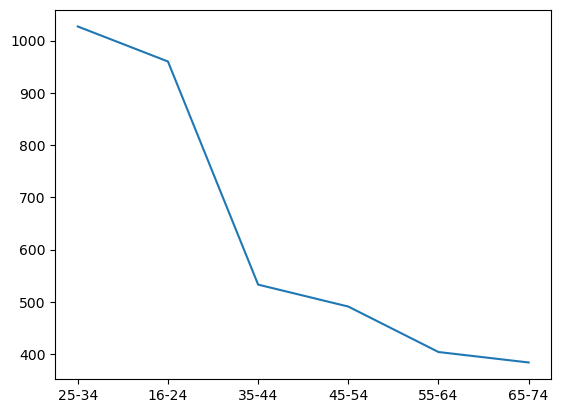

In [12]:
# We can also plot this object, calling .plot()


df.age_group.value_counts().plot()

<AxesSubplot:>

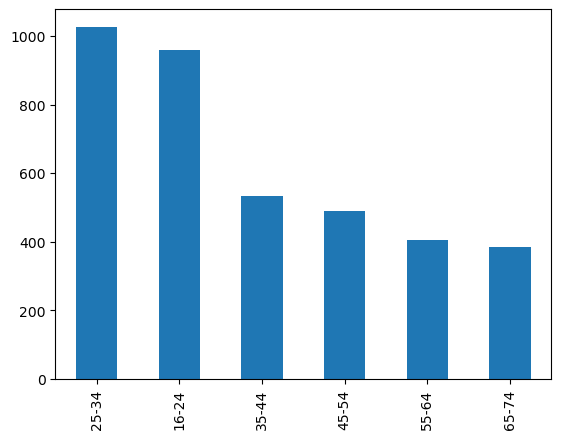

In [13]:
#  .plot() assumes we want a line graph, this is not the case. We can control these plots using the kind parameter
df.age_group.value_counts().plot(kind='bar')

There are some problems here:
* This graph is small, probably hard to read
* Looks a bit dull
* the categories are clearly ordinal, that is 16-24 should probably be shown before 25-34 and so one
* missing titles and axis labels

We can configure matplotlib globally to resolve some of these for all future plots

In [14]:
# List availible styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [15]:
# have a play and choose one you like
plt.style.use('tableau-colorblind10')

In [16]:
# set custom parameters
plt.rcParams.update({'font.size': 22,
                    'figure.figsize':(24,8)})

<AxesSubplot:>

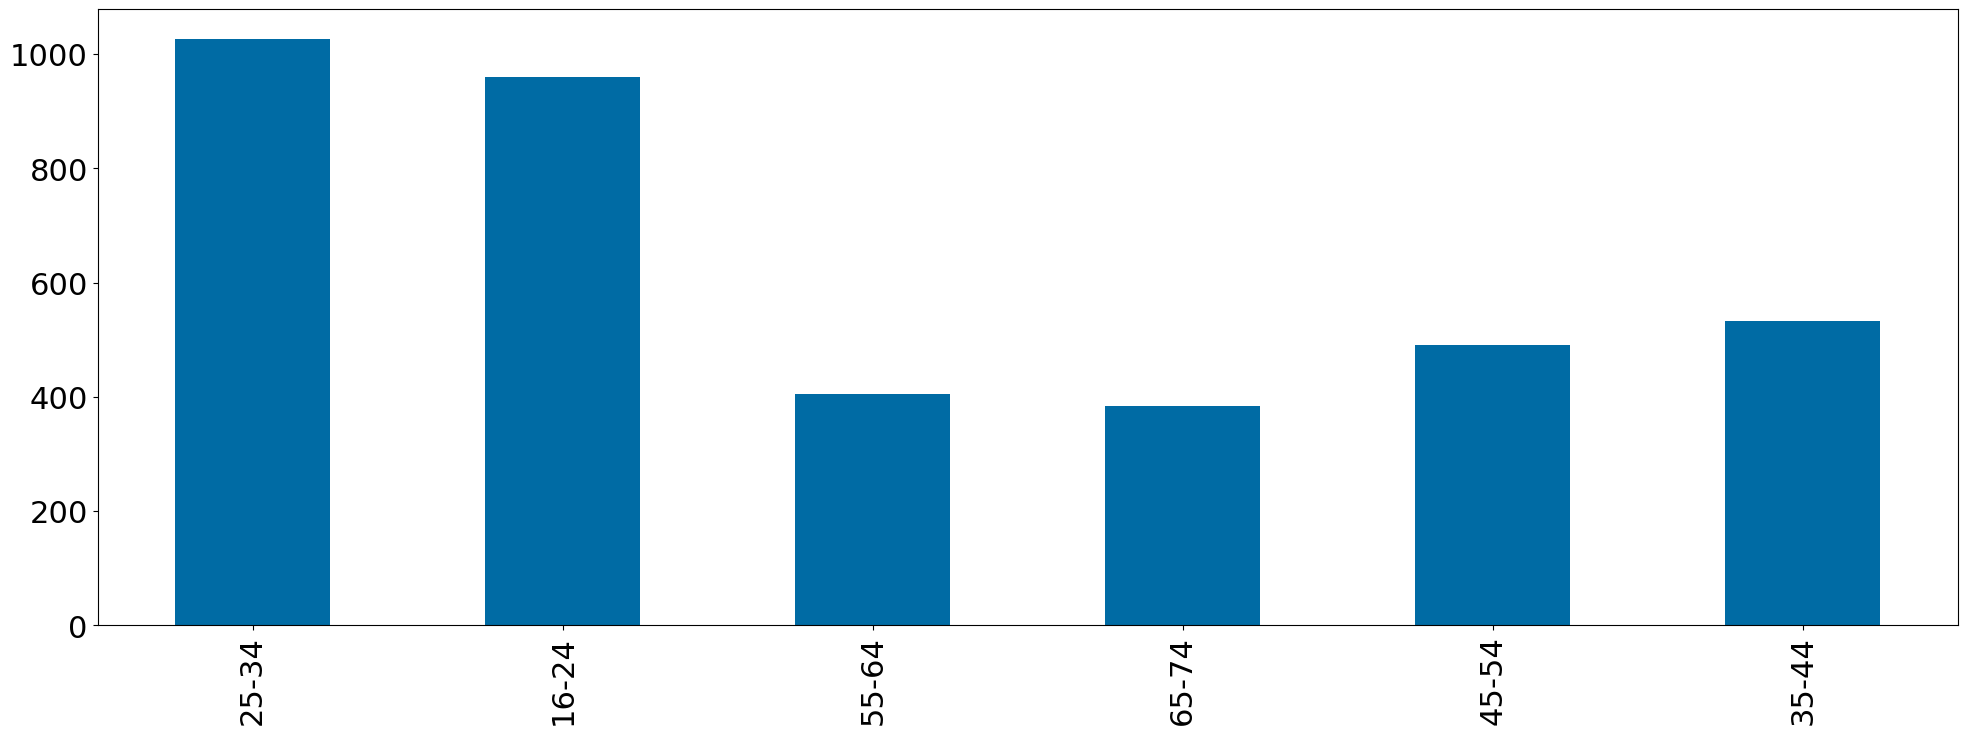

In [17]:
# .plot() assumes we want a line graph, this is not the case. We can control these plots using the kind parameter
df.age_group.value_counts(sort=False).plot(kind='bar')

### creating a categorical type

<AxesSubplot:>

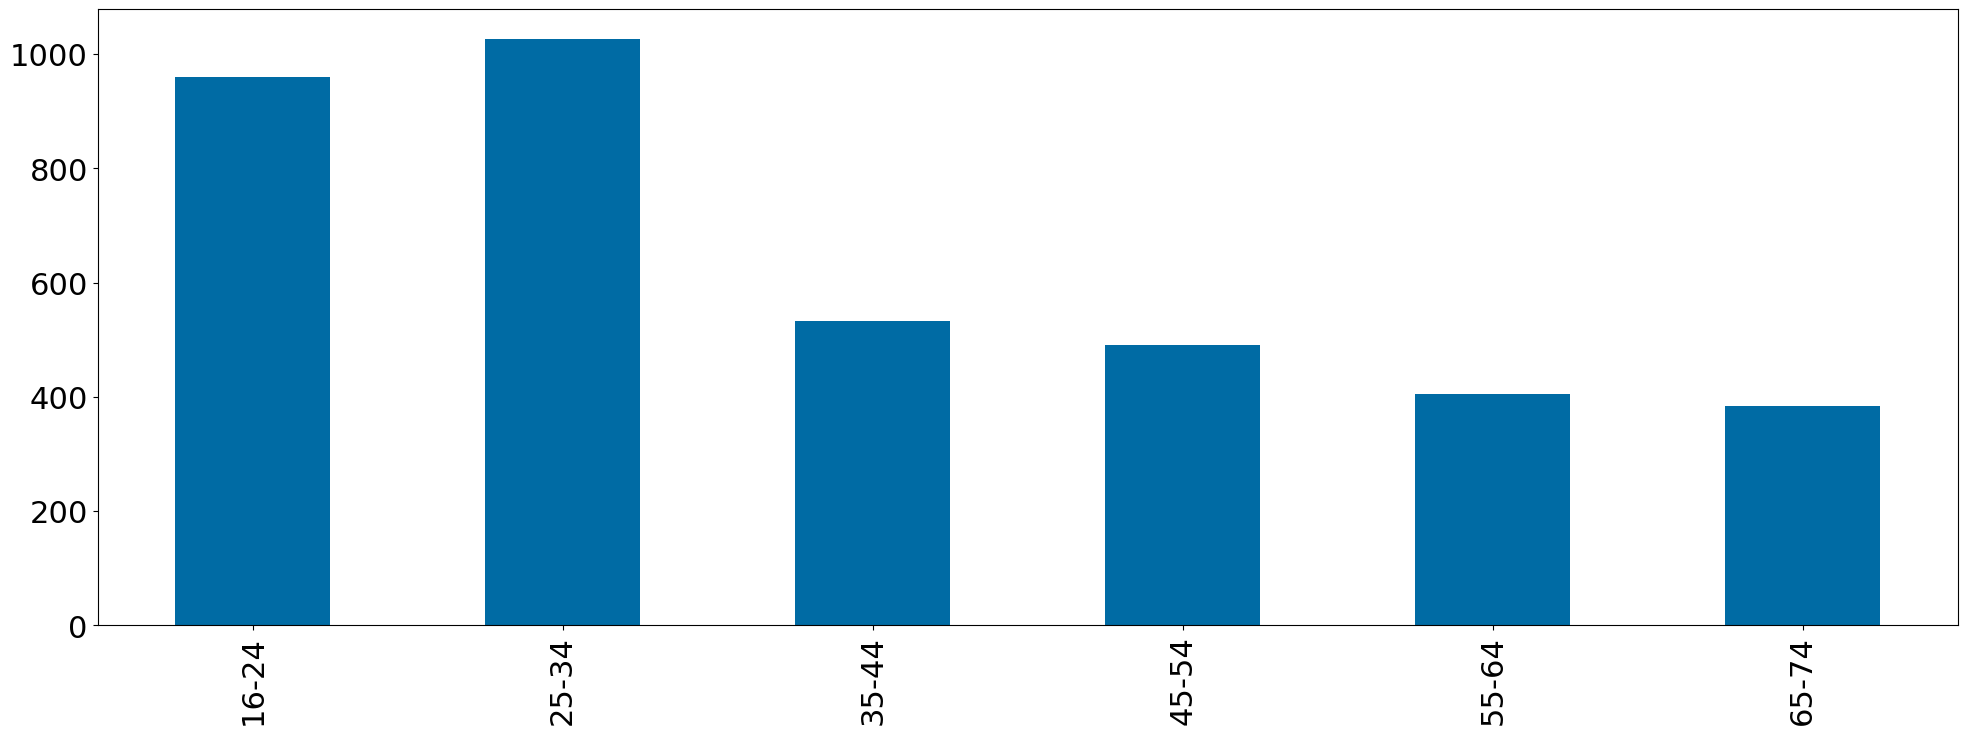

In [18]:
# By default our plot tries to make something visually nice, sorting out bars in descending order.
from pandas.api.types import CategoricalDtype

# make a category
category_age = CategoricalDtype(
    ['16-24', '25-34', '35-44', '45-54', '55-64', '65-74'], 
    ordered=True)

# replace our row with this category data
df['age_group'] = df['age_group'].astype(category_age)

# plot, but no longer sort descending as default
df.age_group.value_counts(sort=False).plot(kind='bar')

<AxesSubplot:title={'center':'Frequency of Age groups'}>

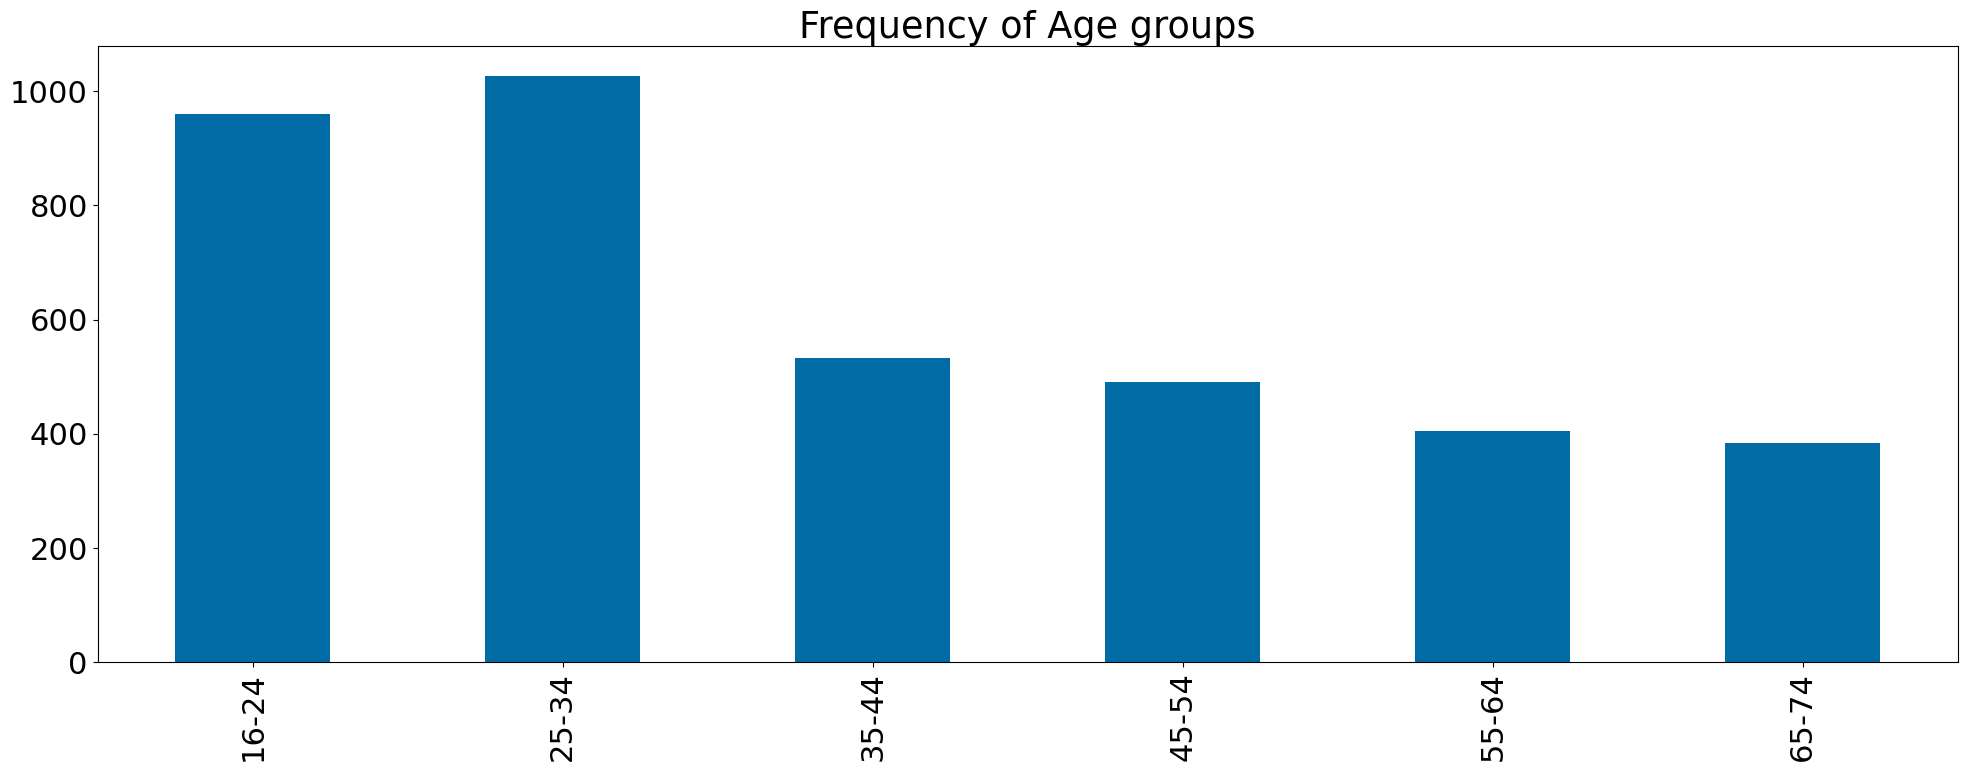

In [19]:
# Add title
# And finally we can add a title with the title key in our plot function.
df.age_group.value_counts(sort=False).plot(kind='bar', style='_classic_test_patch', title="Frequency of Age groups")

So we can see we have an overepresented population of under 35s, though we do have some older respondants represented.
This could be very important to note later, poor training data in a model could mean we align closer with the more youthful oppinions on sexual attitudes.

In [20]:
df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


<AxesSubplot:title={'center':'sex by value'}>

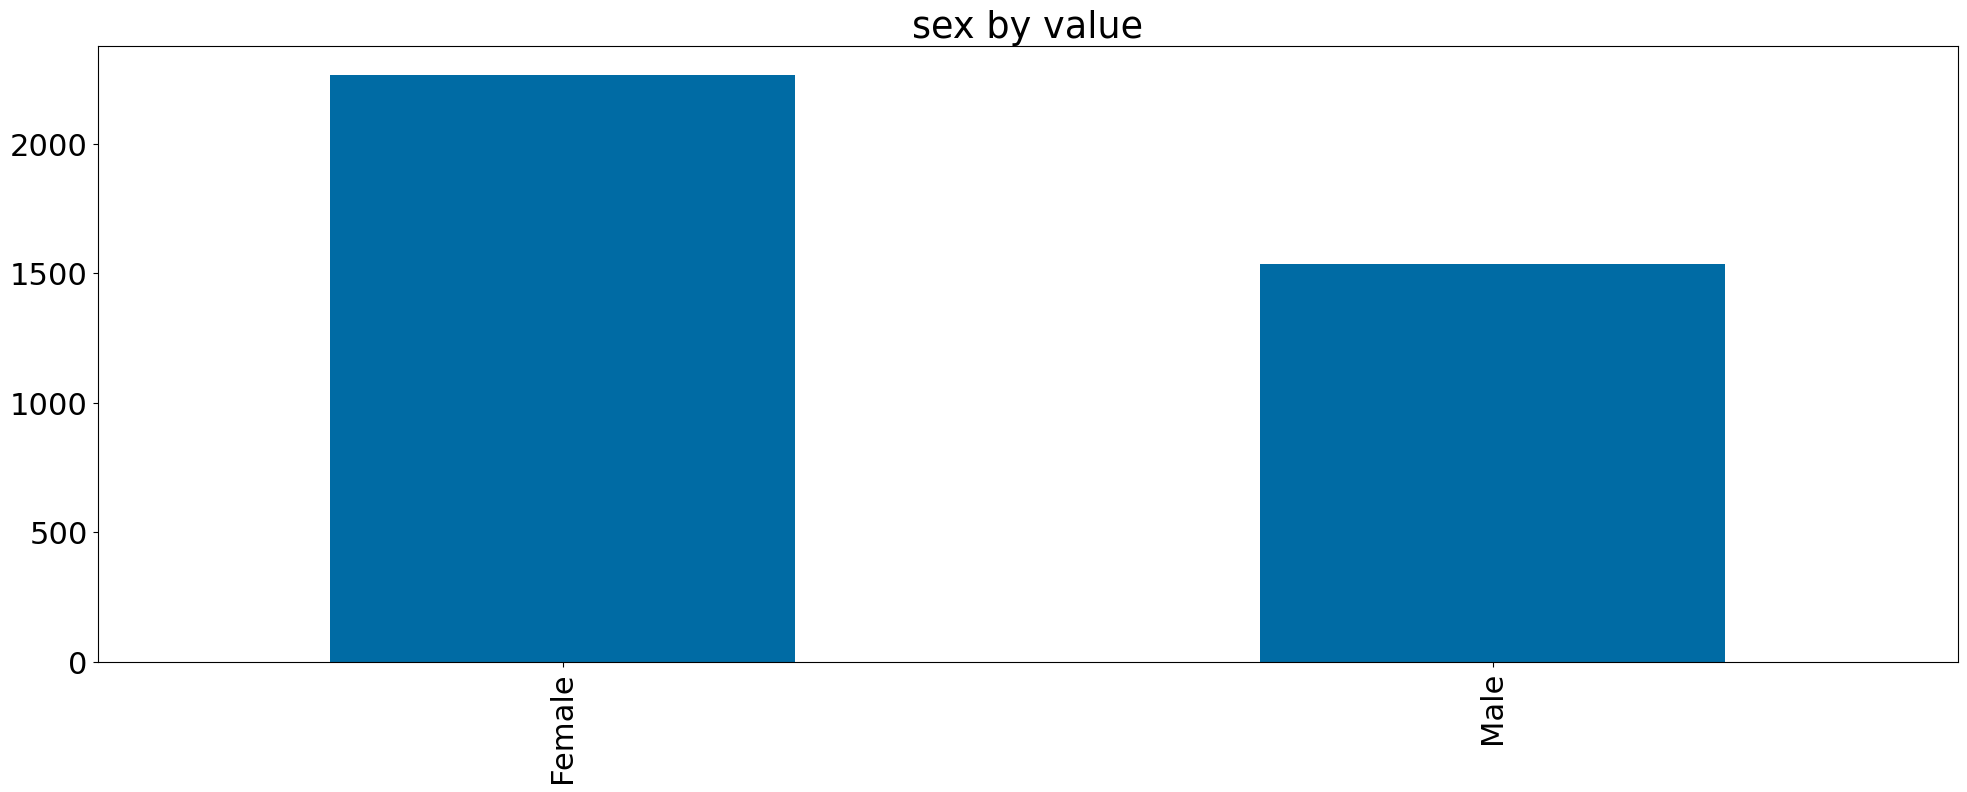

In [21]:
df['sex'].value_counts().plot(kind='bar', title="sex by value")

<AxesSubplot:title={'center':'ethnic group by value'}>

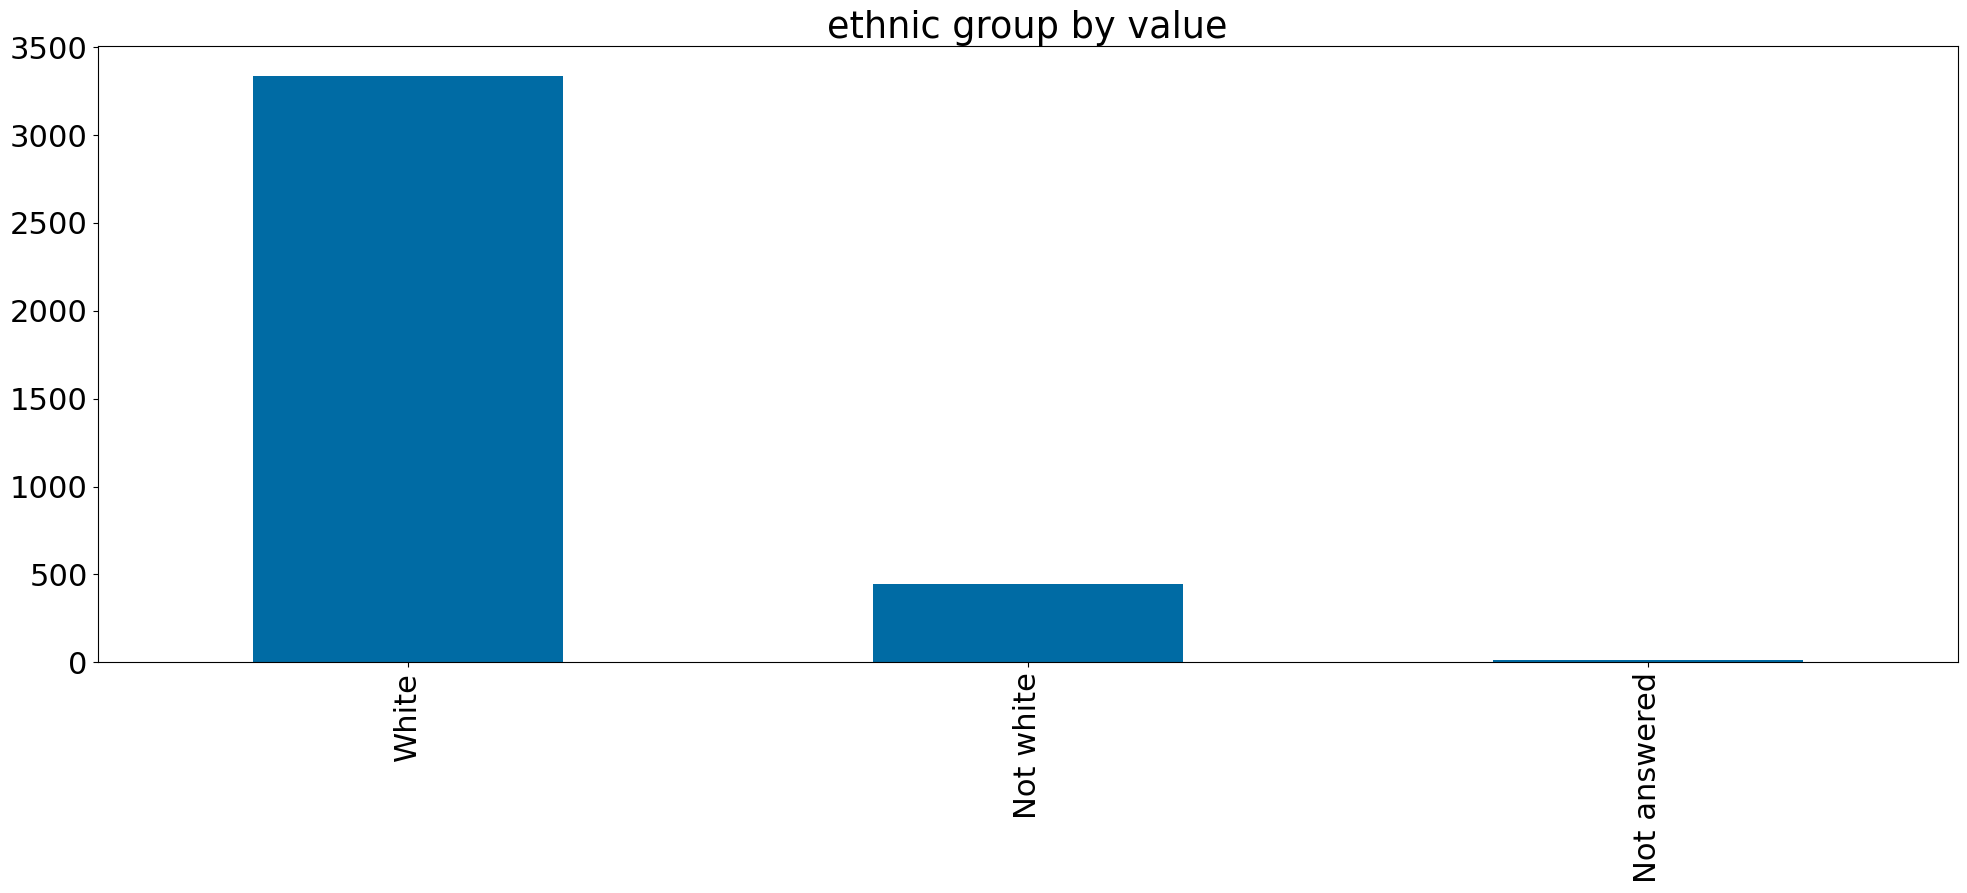

In [22]:
df['ethnic_group'].value_counts().plot(kind='bar', title="ethnic group by value")

<AxesSubplot:title={'center':'sexuality by value'}>

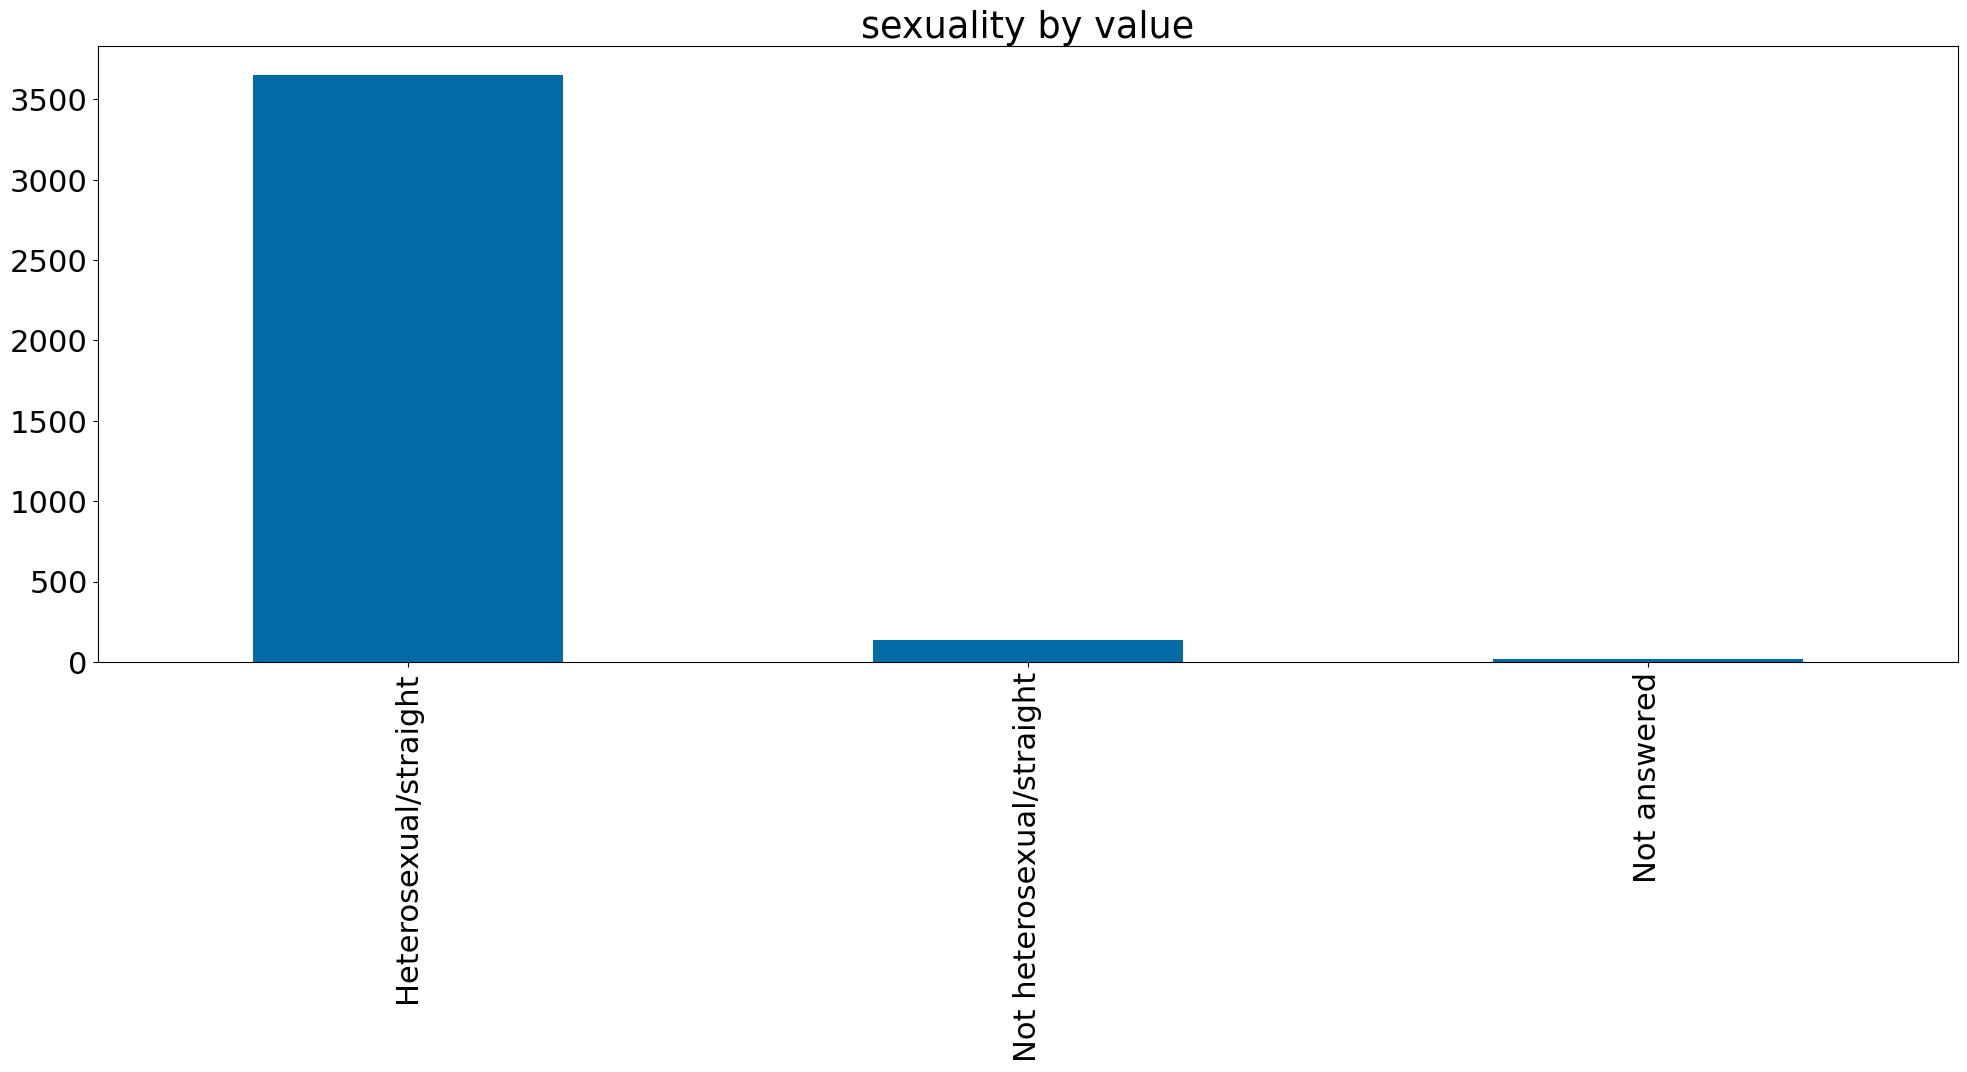

In [23]:
df['sexual_identity'].value_counts().plot(kind='bar', title="sexuality by value")

<AxesSubplot:title={'center':'relationship status by value'}>

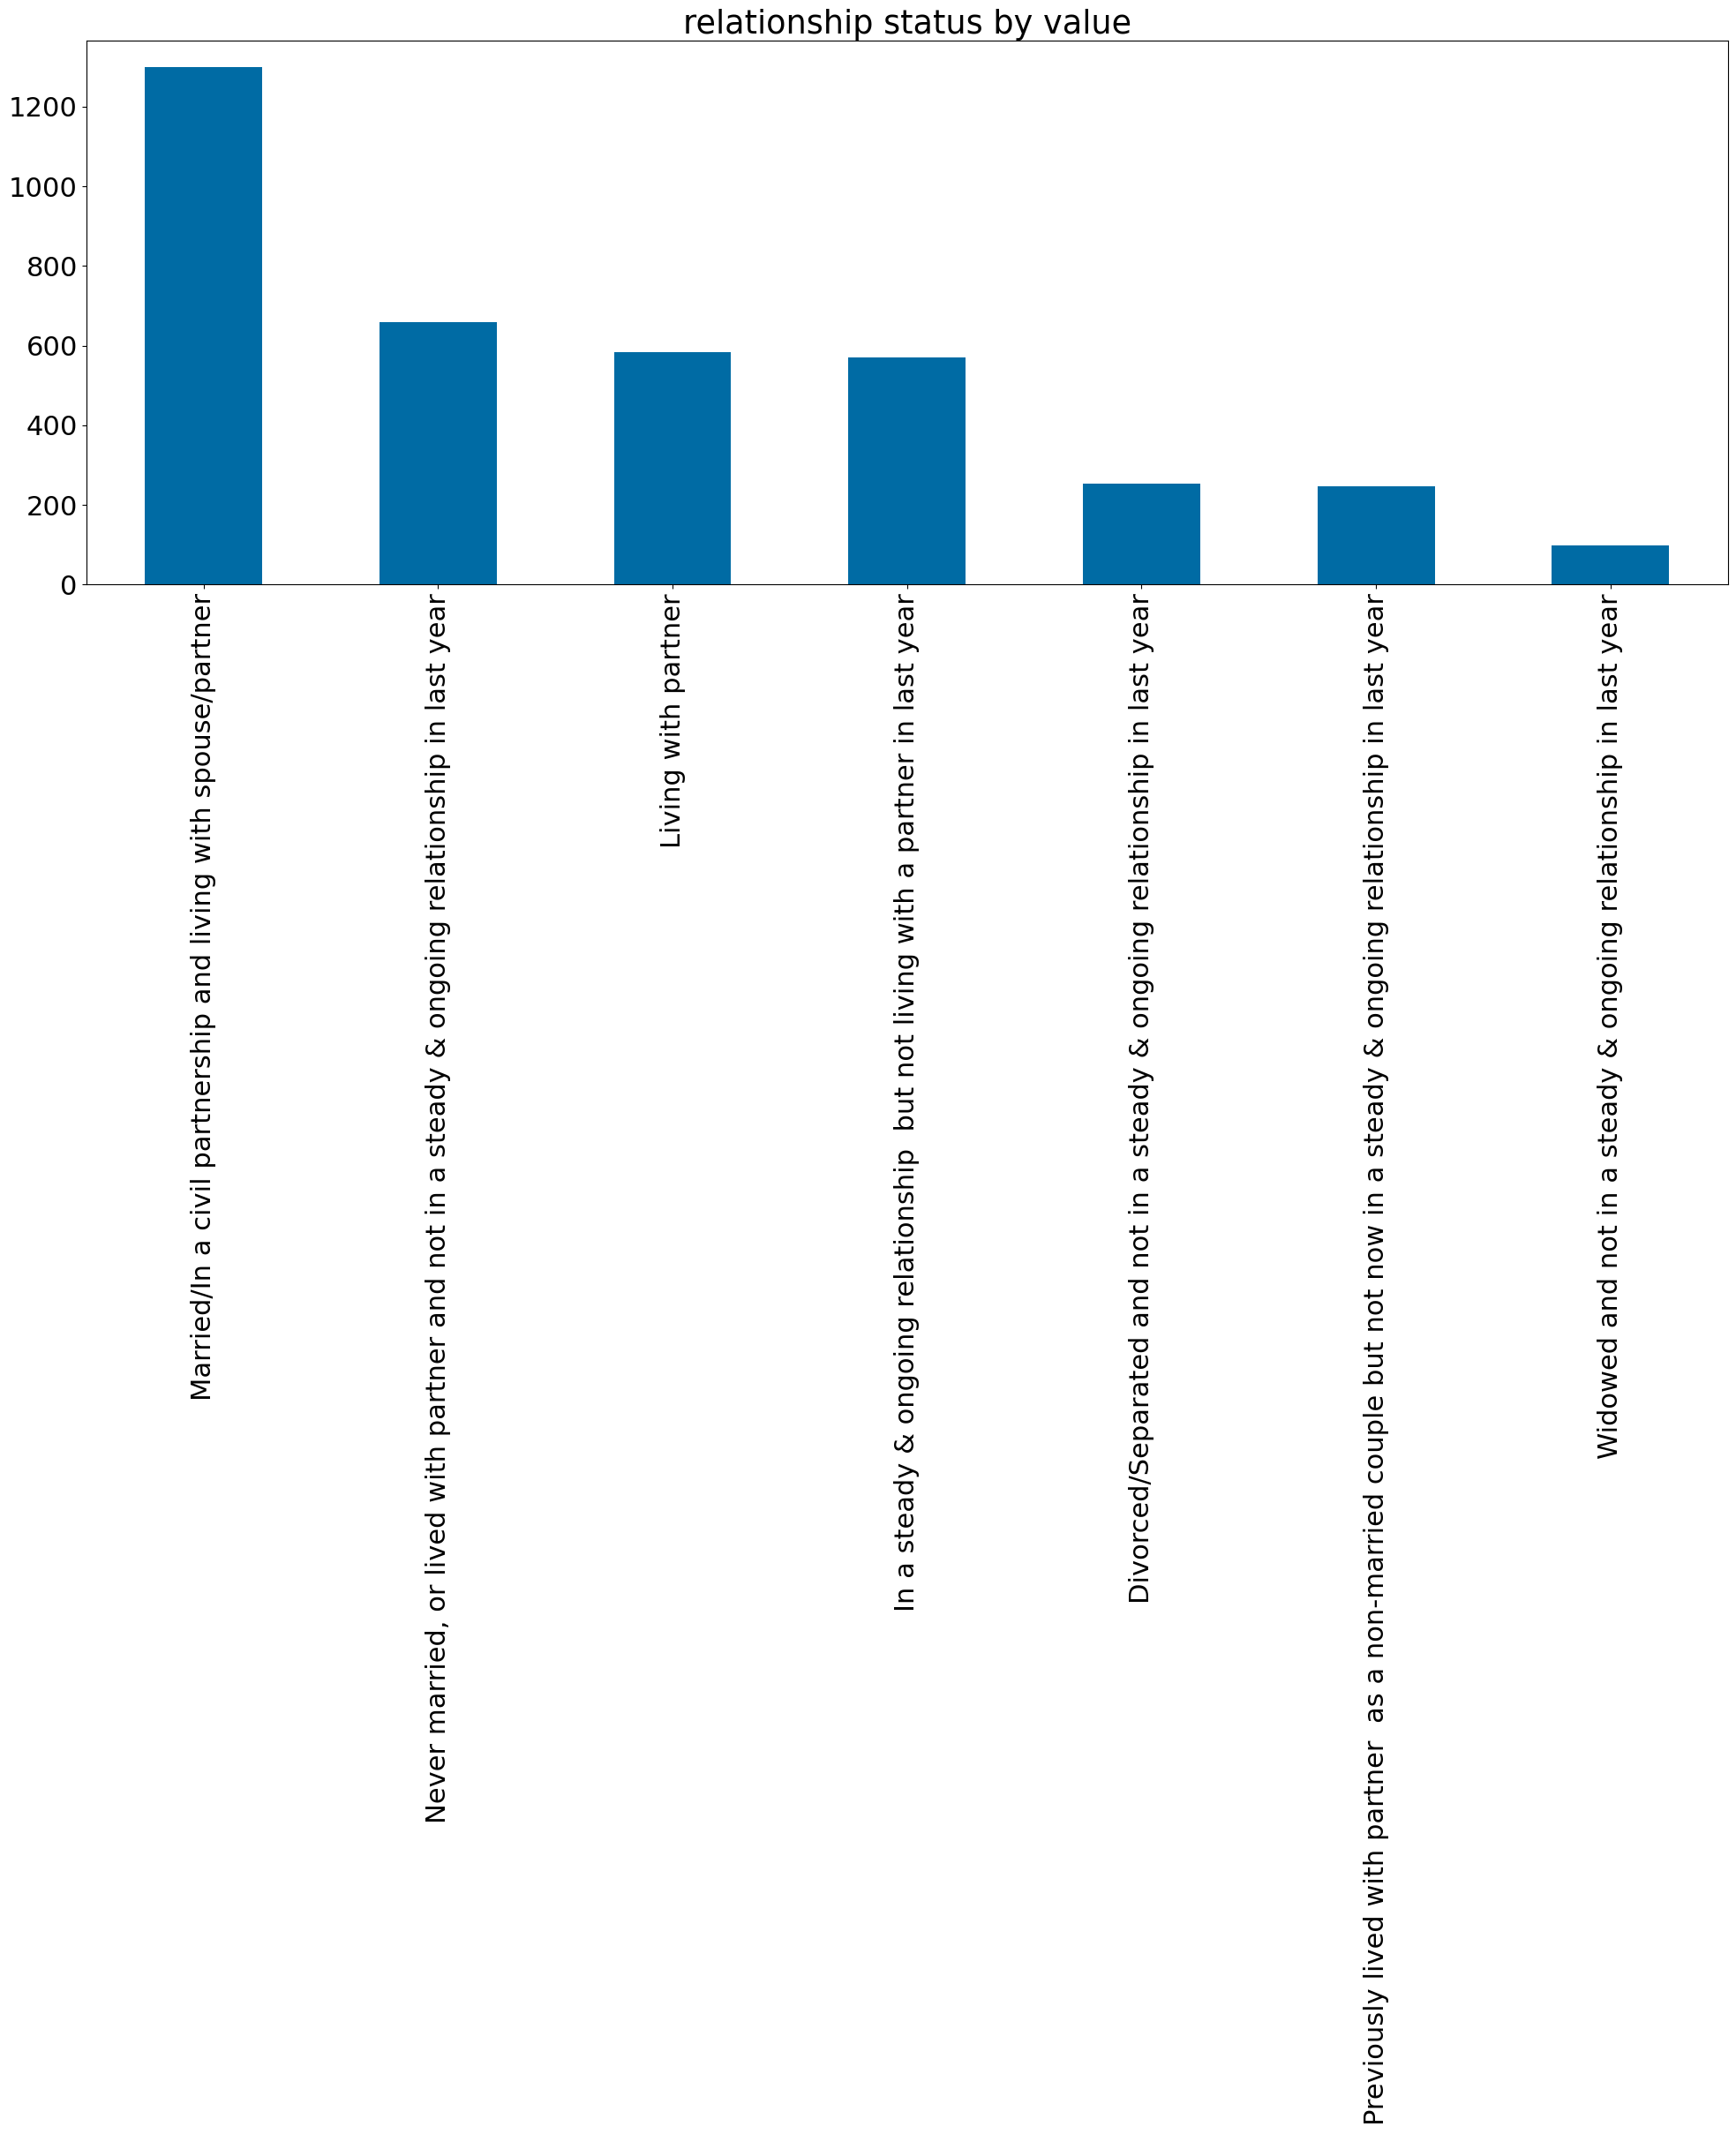

In [24]:
df['relationship_status'].value_counts().plot(kind='bar', title="relationship status by value")

<AxesSubplot:title={'center':'number of respondants with children'}>

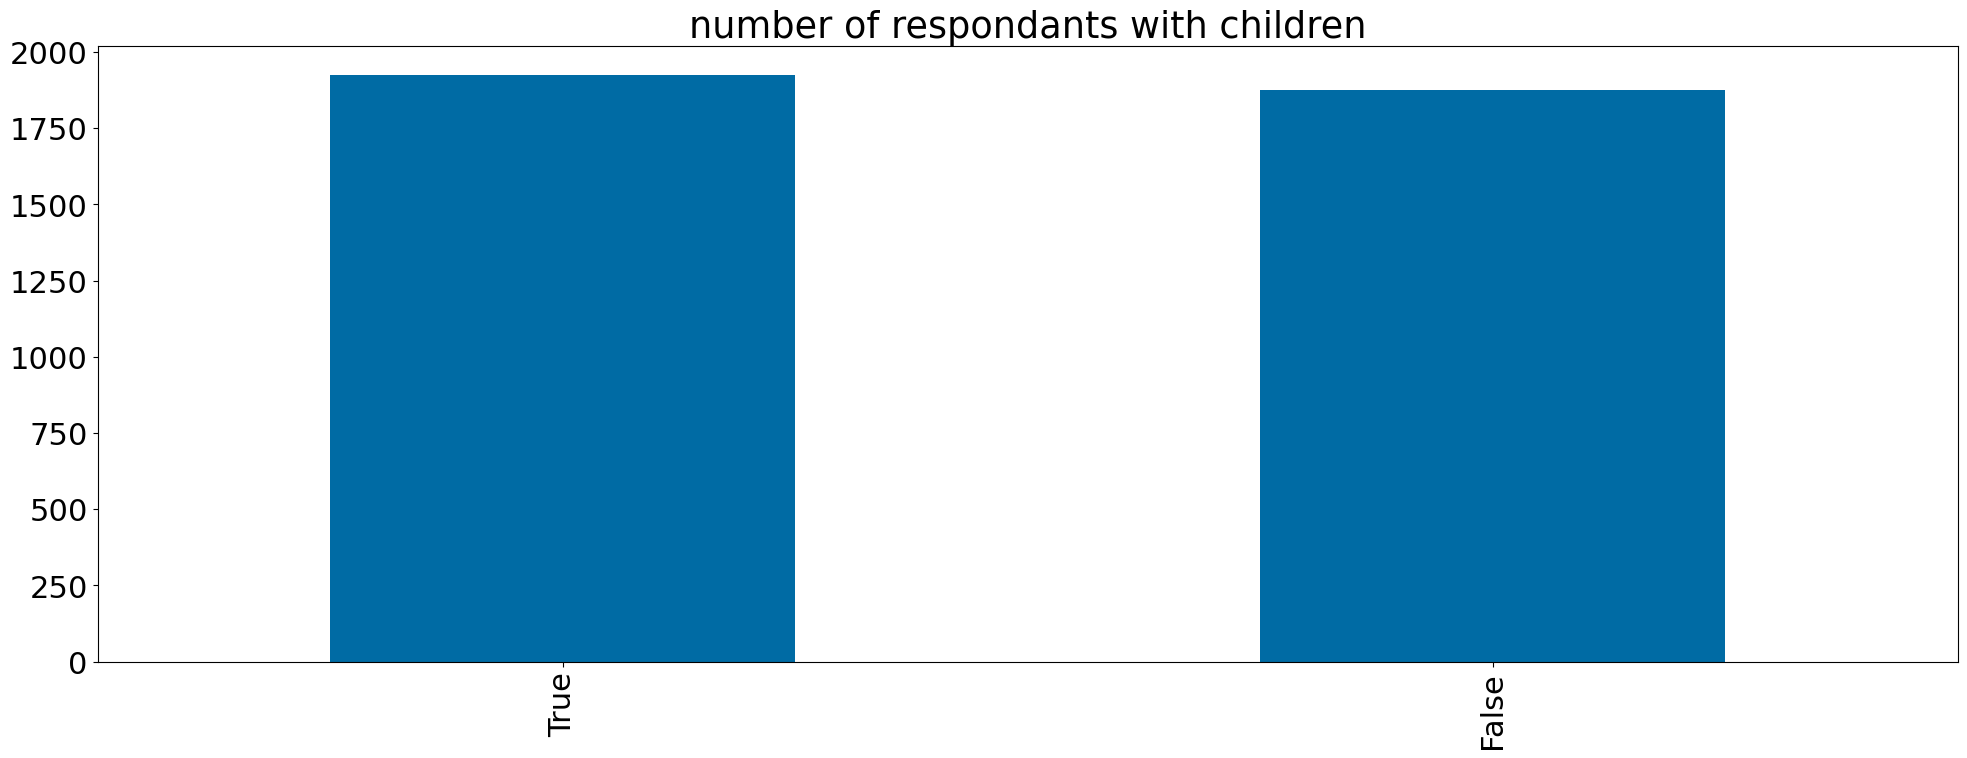

In [25]:
df['has_child'].value_counts().plot(kind='bar', title="number of respondants with children")

<AxesSubplot:title={'center':"opinions on 'are one night stands okay?' by value"}>

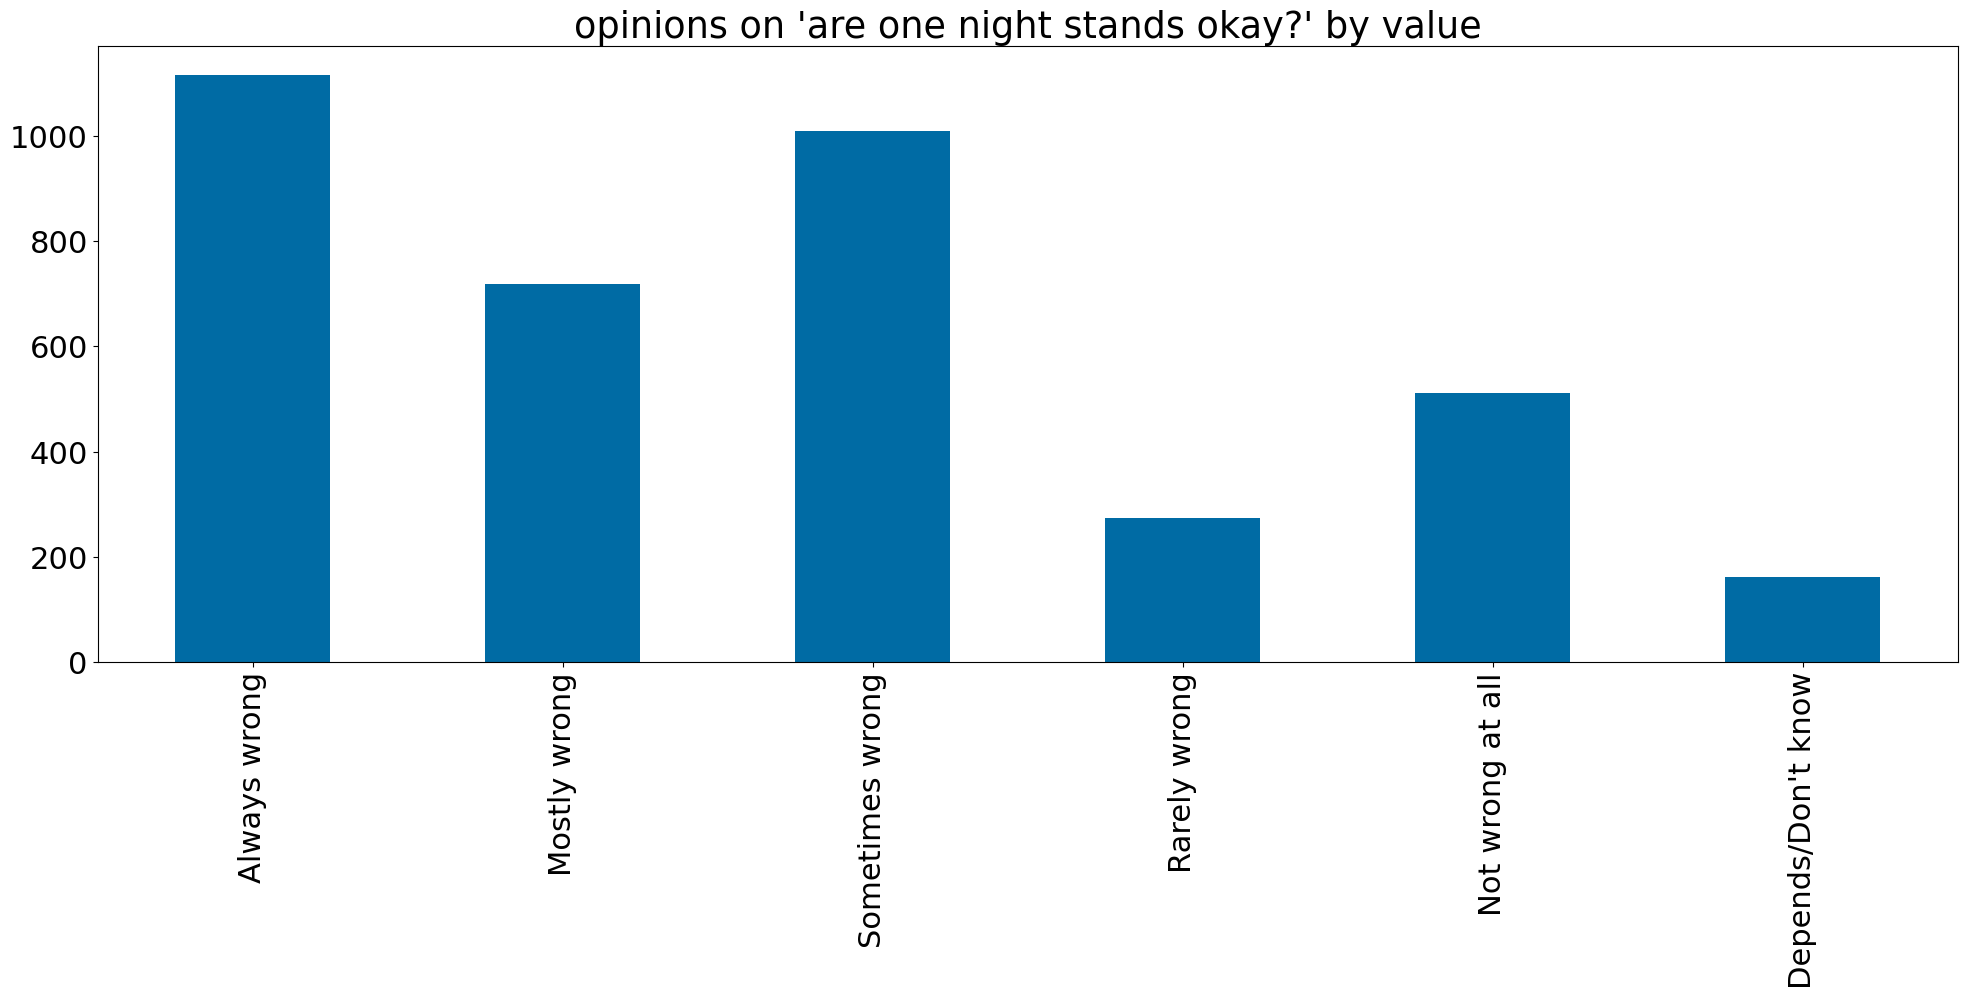

In [26]:
category_opp = CategoricalDtype(
    ['Always wrong', 'Mostly wrong', 'Sometimes wrong', 'Rarely wrong', 'Not wrong at all', "Depends/Don't know"], 
    ordered=True
)

# replace our row with this category data
df['opp_one_night_stand_ok'] = df['opp_one_night_stand_ok'].astype(category_opp)

df['opp_one_night_stand_ok'].value_counts(sort=False).plot(kind='bar', title="opinions on 'are one night stands okay?' by value")

In [27]:
df['opp_sex_without_love_ok'].value_counts()

Agree                        1571
Neither agree or disagree     904
Disagree                      565
Agree strongly                468
Disagree strongly             257
Don't know                     24
Name: opp_sex_without_love_ok, dtype: int64

<AxesSubplot:title={'center':"Do you agree with the statement 'Sex without love is okay' by value"}>

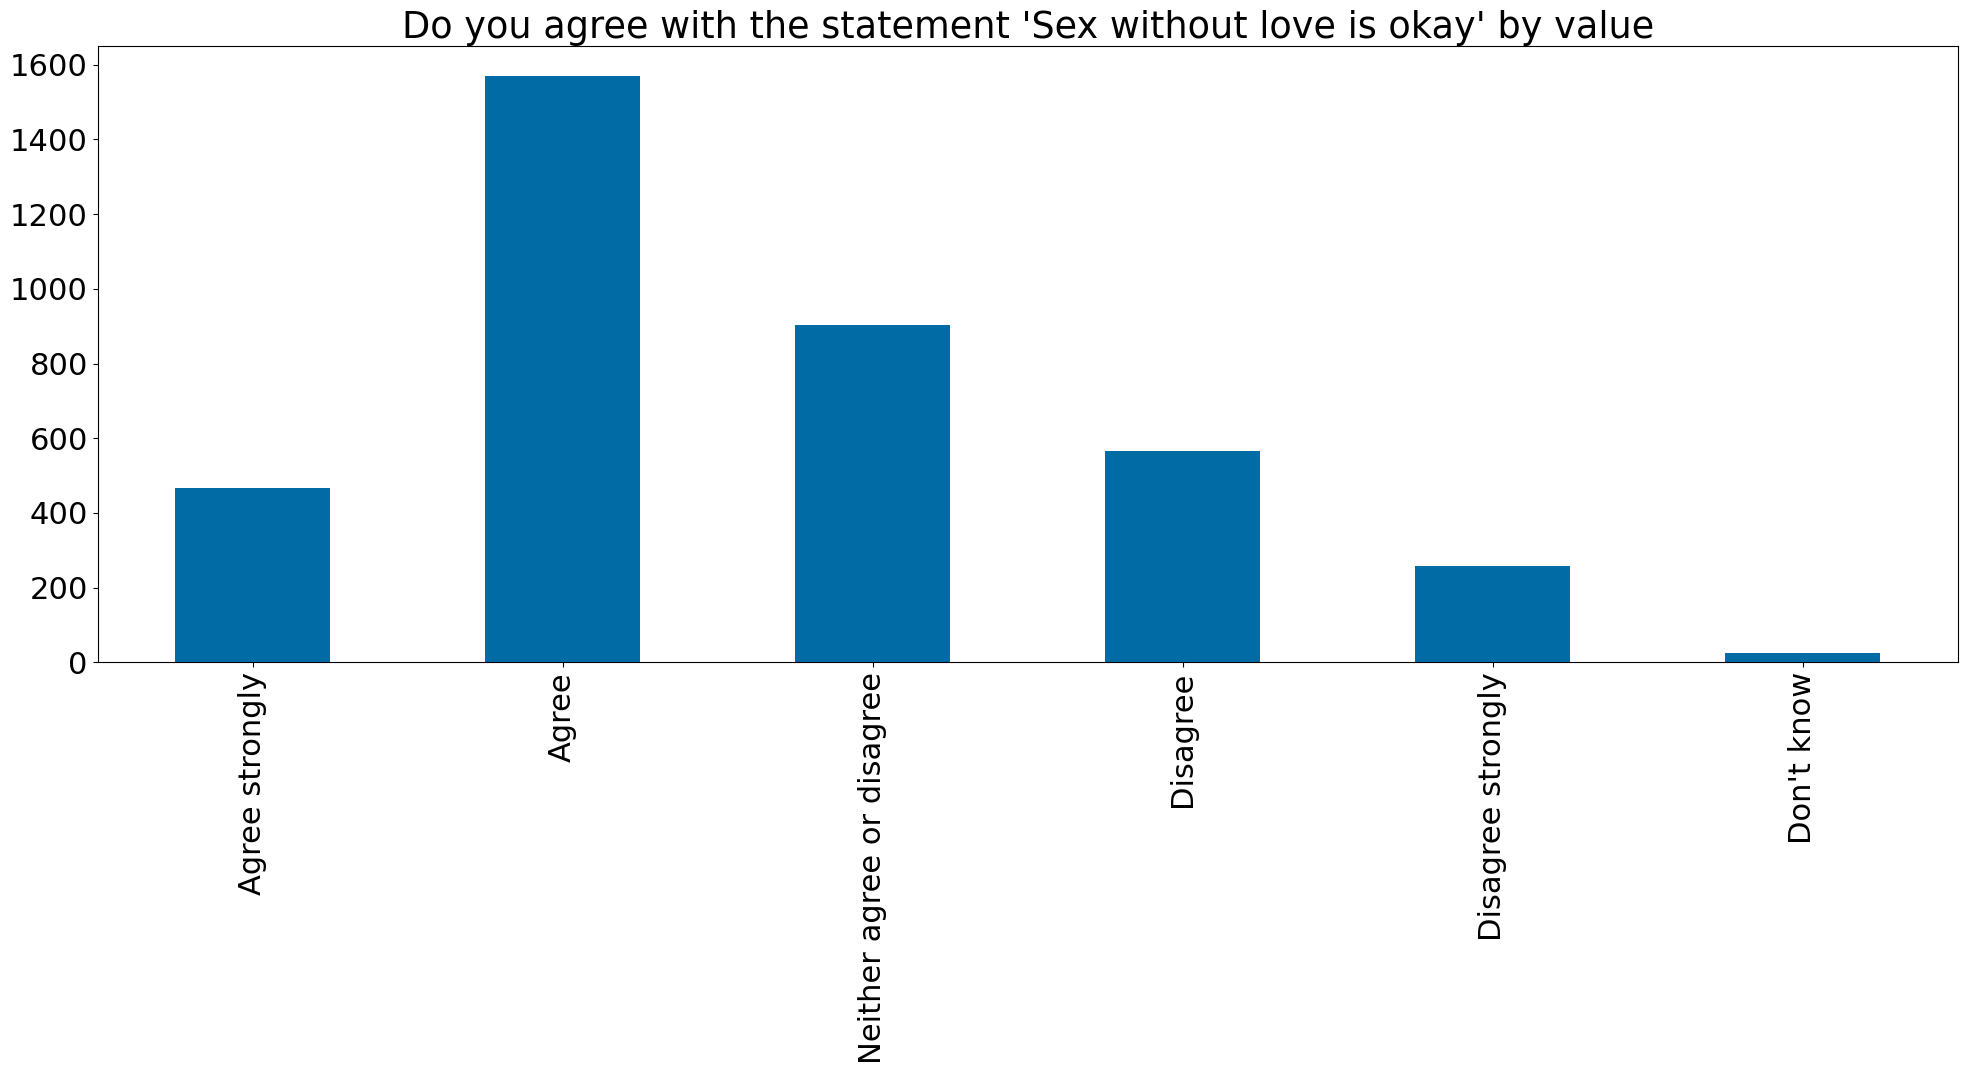

In [28]:
category_agree = CategoricalDtype(
    ['Agree strongly', 'Agree', 'Neither agree or disagree', 'Disagree', 'Disagree strongly', "Don't know"], 
    ordered=True
)             

# replace our row with this category data
df['opp_sex_without_love_ok'] = df['opp_sex_without_love_ok'].astype(category_agree)

df['opp_sex_without_love_ok'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'Sex without love is okay' by value")

In [29]:
df['opp_pressure_to_have_sex'].value_counts()

Agree                        1685
Agree strongly                943
Neither agree or disagree     647
Disagree                      398
Don't know                     60
Disagree strongly              57
Name: opp_pressure_to_have_sex, dtype: int64

<AxesSubplot:title={'center':"Do you agree with the statement 'There is pressure to have sex' by value"}>

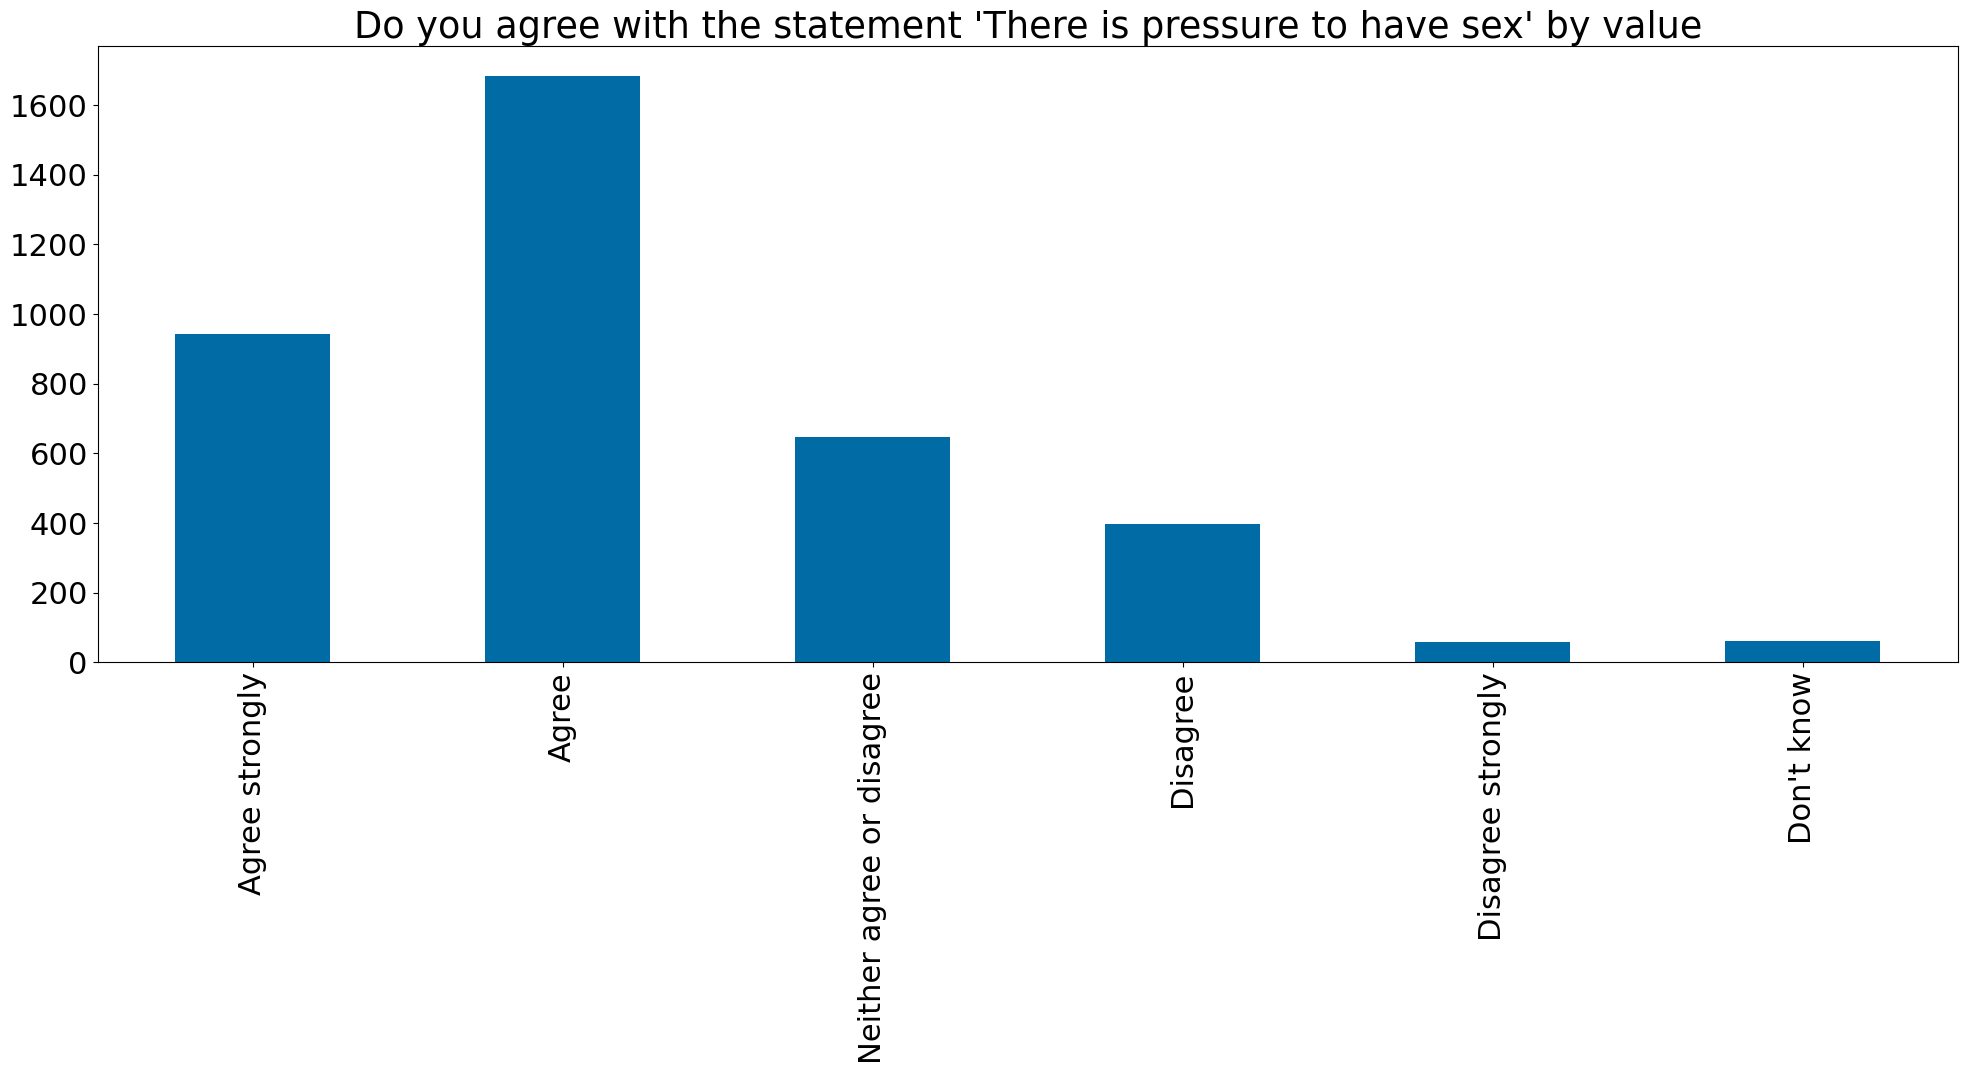

In [30]:
# replace our row with this category data
df['opp_pressure_to_have_sex'] = df['opp_pressure_to_have_sex'].astype(category_agree)

df['opp_pressure_to_have_sex'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'There is pressure to have sex' by value")

<AxesSubplot:title={'center':"Do you agree with the statement 'Men have a higher sex drive than women?' by value"}>

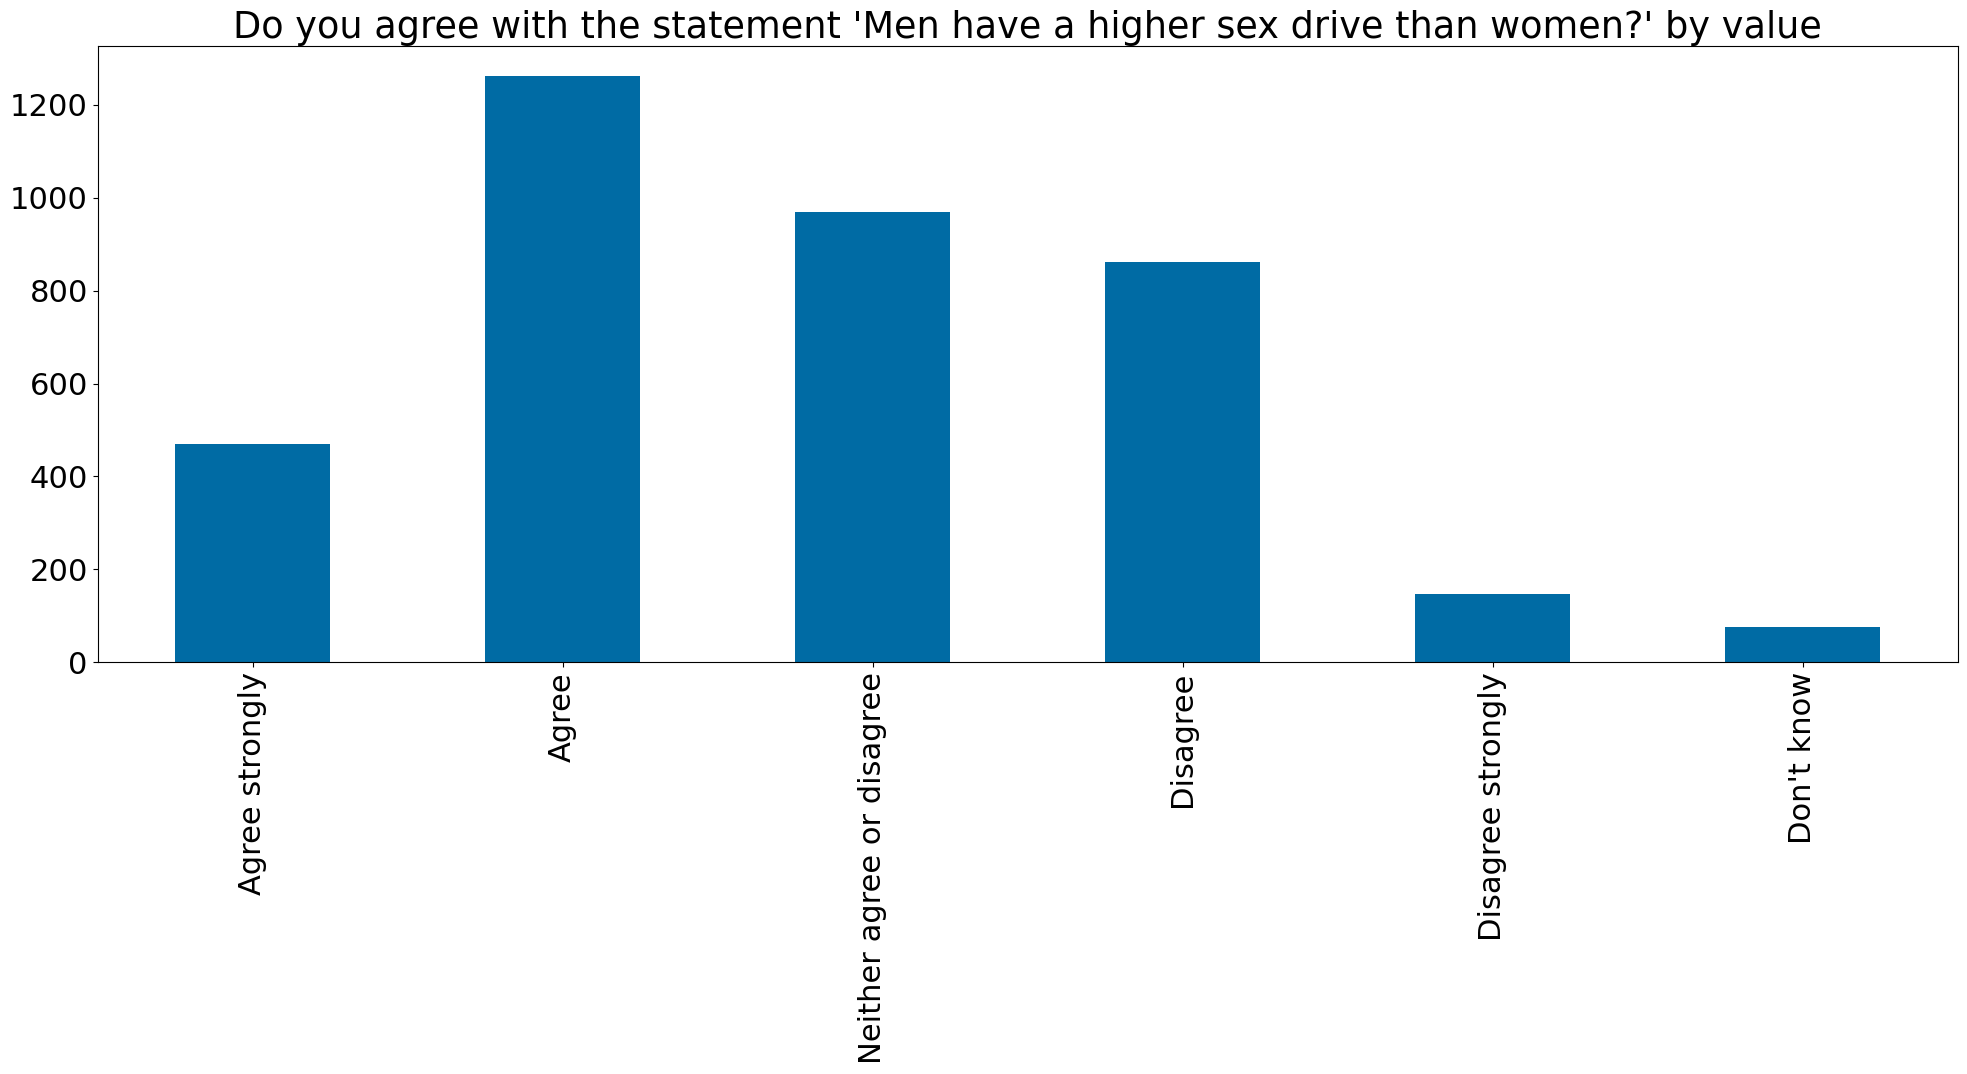

In [31]:
# replace our row with this category data
df['opp_men_have_higher_sex_drive'] = df['opp_men_have_higher_sex_drive'].astype(category_agree)

df['opp_men_have_higher_sex_drive'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'Men have a higher sex drive than women?' by value")

<AxesSubplot:title={'center':"Male - Do you agree with the statement 'Men have a higher sex drive than women?' by value"}>

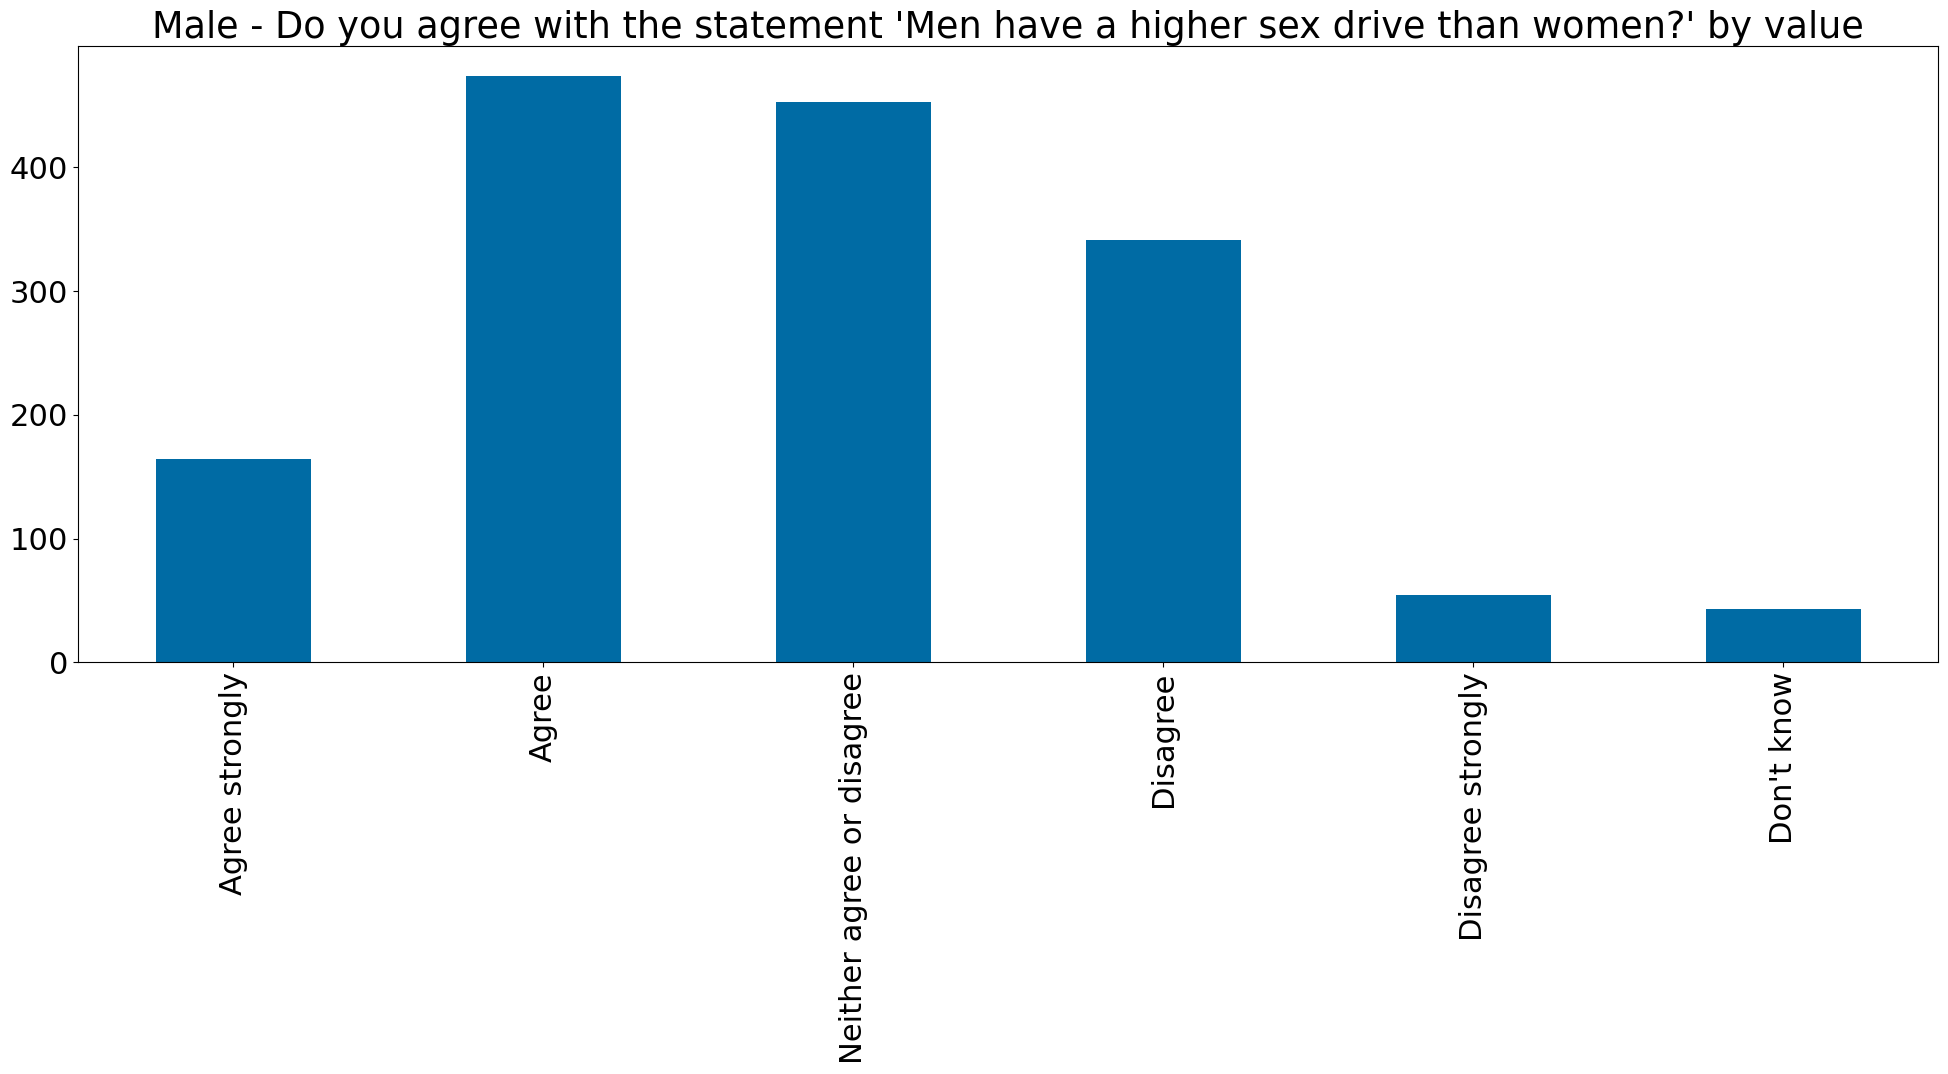

In [32]:
# We can also filter by sex here
df[df['sex'] == 'Male']['opp_men_have_higher_sex_drive'].value_counts(sort=False).plot(kind='bar', title="Male - Do you agree with the statement 'Men have a higher sex drive than women?' by value")

<AxesSubplot:title={'center':"Female - Do you agree with the statement 'Men have a higher sex drive than women?' by value"}>

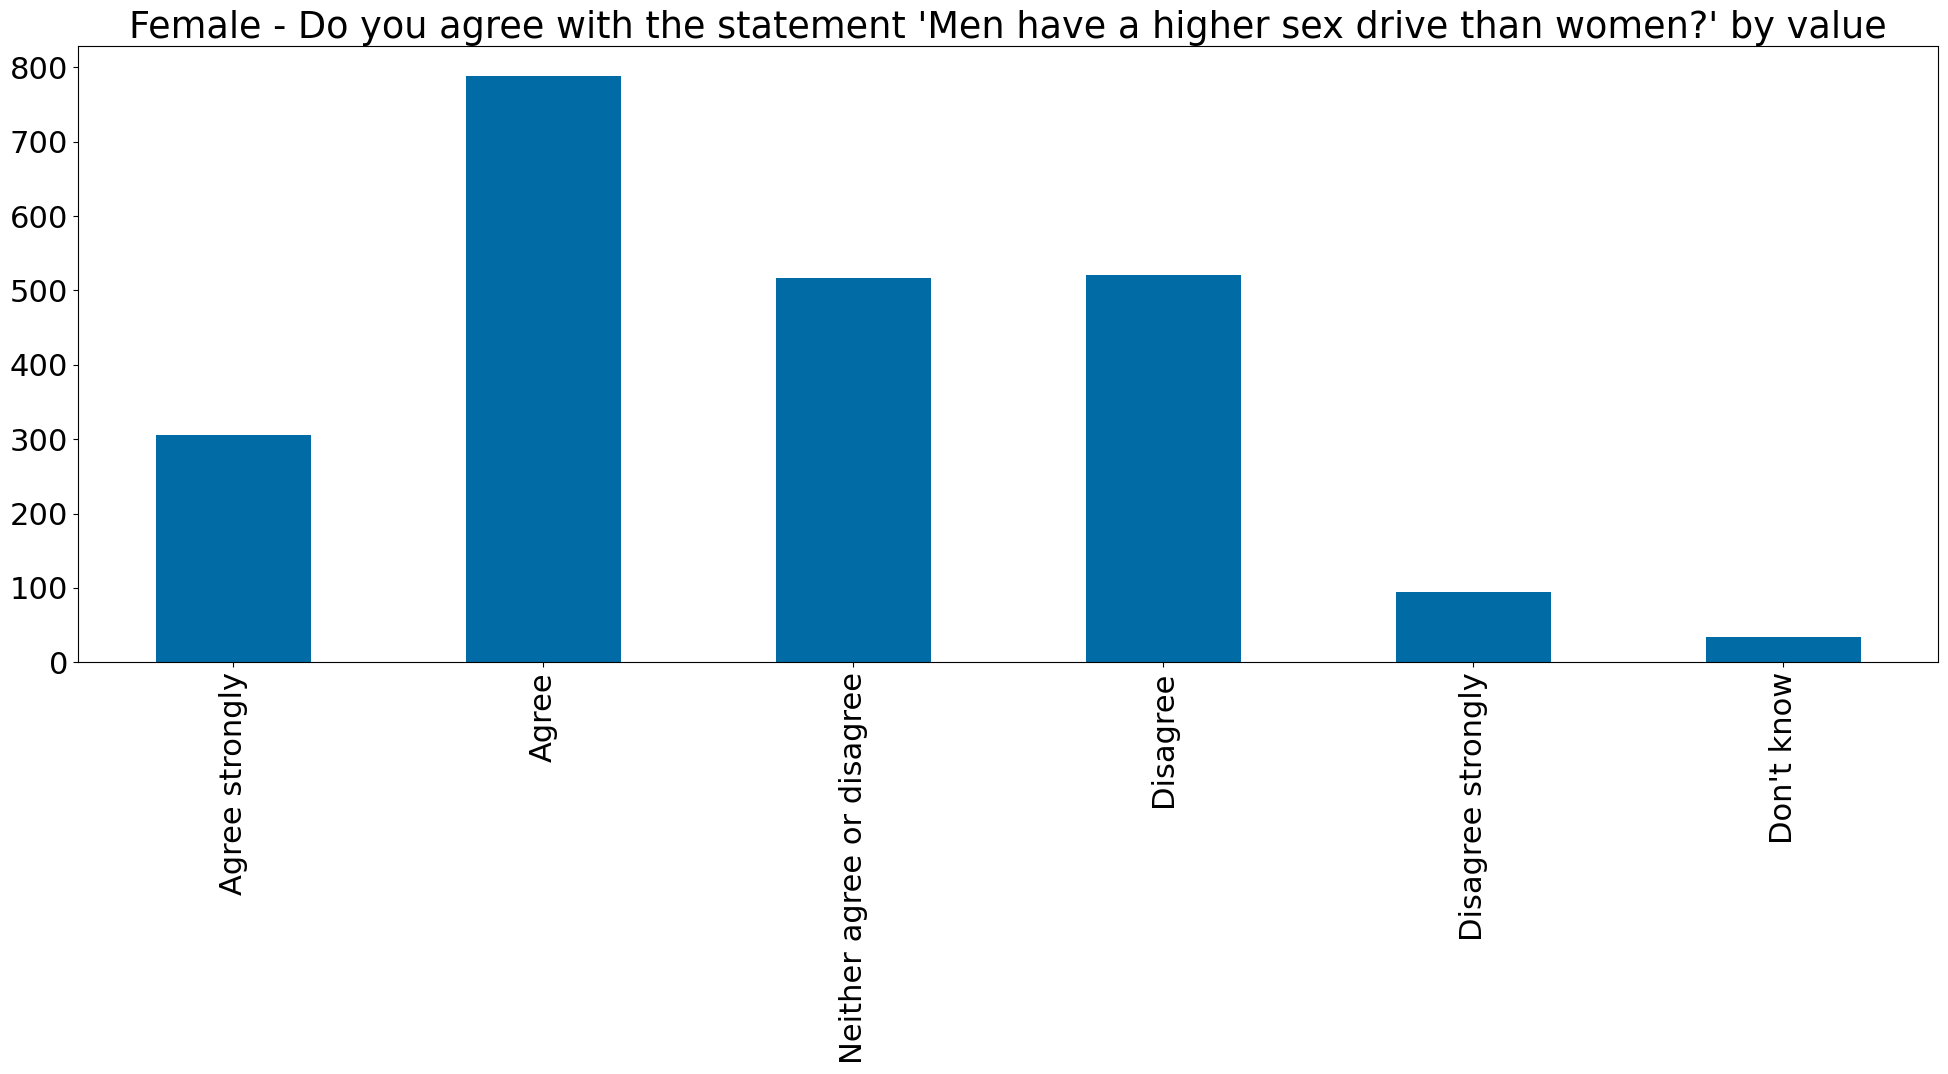

In [33]:
# We can also filter by sex here
df[df['sex'] == 'Female']['opp_men_have_higher_sex_drive'].value_counts(sort=False).plot(kind='bar', title="Female - Do you agree with the statement 'Men have a higher sex drive than women?' by value")

<AxesSubplot:title={'center':"Do you agree with the statement 'There is too much sex in media' by value"}>

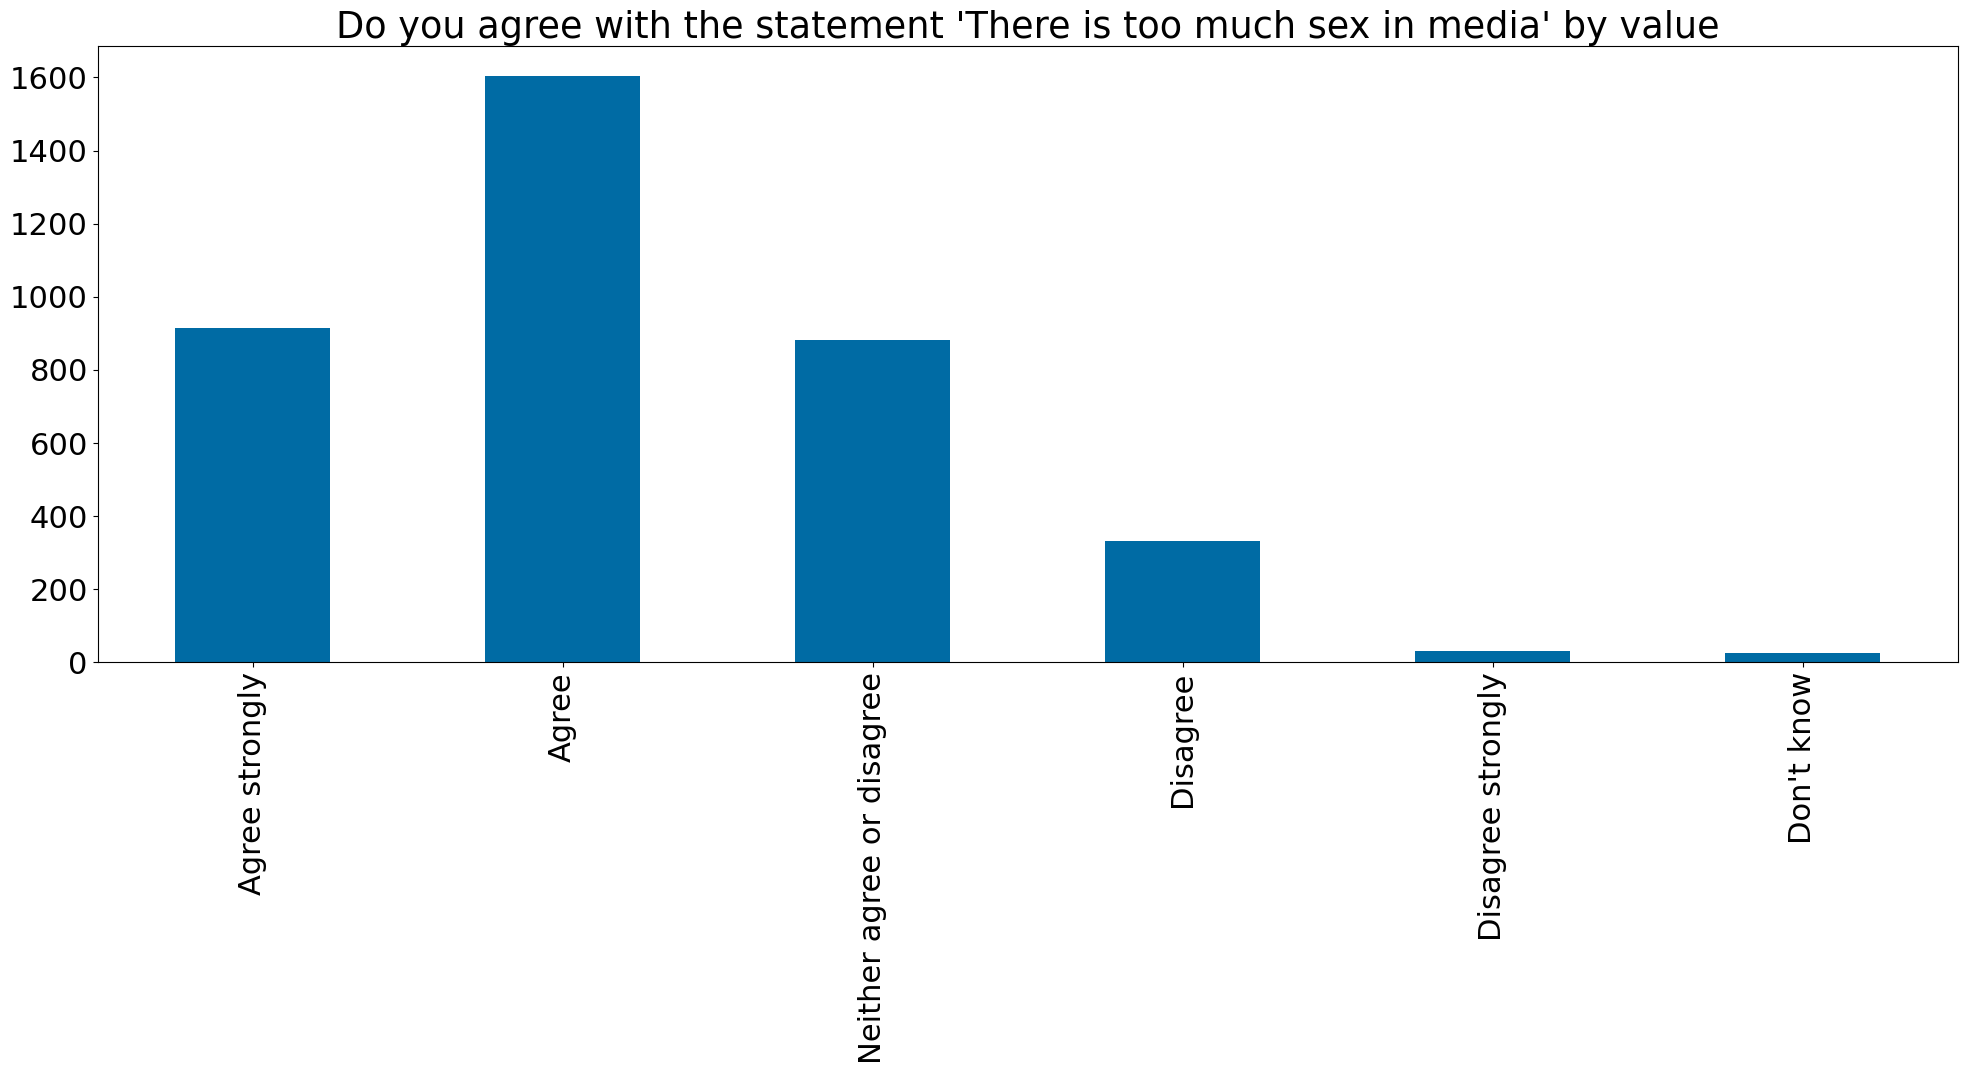

In [34]:
# replace our row with this category data
df['opp_too_much_sex_media'] = df['opp_too_much_sex_media'].astype(category_agree)

df['opp_too_much_sex_media'].value_counts(sort=False).plot(kind='bar', title="Do you agree with the statement 'There is too much sex in media' by value")

# Disclosure Control
At this point we have some quite personal looking data.
Special category data - ethnic group, sexual identity.
We are also holding directly personal data - full name is quite bad, e-mail is worse!

## Disclosure Control - Redaction
We need to do something to protect these individuals. first name, last name and email all are unneeded for our research. In any non-demo situation I would drop these columns.
Redaction - Removing data deemed too sensitive. Perhaps removing an entire row or column.

In [35]:
df['first_name_demo'] = df['first_name']
df['last_name_demo'] = df['last_name']
df['email_demo'] = df['email']

df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media,first_name_demo,last_name_demo,email_demo
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree,Adolphus,Giraudoux,agiraudoux7j@forbes.com
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree,Vaclav,Tydeman,vtydeman2d@jimdo.com
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly,Cynthia,Izachik,cizachik41@latimes.com
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree,Coop,Yurygyn,cyurygyng1@usgs.gov
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly,Hammad,Pillington,hpillington43@bizjournals.com


In [36]:
# We could redact some columns using drop()
df = df.drop(columns=['first_name_demo', 'last_name_demo', 'email_demo'])

df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


## Disclosure Control - Masking
Masking - Replacing parts of the data that are sensitive, for example replacing names with synthetic names, initials or empty strings.
This is a bit more difficult, but could be more useful. We can showcase that this data did have names, emails or more data without hiding it's existence entirely.
If we want to do something as simple as Nulling out, that's quite simple.

In [37]:
# rebuild our demo columns
df['first_name_demo'] = df['first_name']
df['last_name_demo'] = df['last_name']
df['email_demo'] = df['email']

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

,first_name_demo,last_name_demo,email_demo
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com
1,Vaclav,Tydeman,vtydeman2d@jimdo.com
2,Cynthia,Izachik,cizachik41@latimes.com
3,Coop,Yurygyn,cyurygyng1@usgs.gov
4,Hammad,Pillington,hpillington43@bizjournals.com


In [38]:
# we can replace all of our first names with null values
df['first_name_demo'] = ''

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

,first_name_demo,last_name_demo,email_demo
0,,Giraudoux,agiraudoux7j@forbes.com
1,,Tydeman,vtydeman2d@jimdo.com
2,,Izachik,cizachik41@latimes.com
3,,Yurygyn,cyurygyng1@usgs.gov
4,,Pillington,hpillington43@bizjournals.com


We have Nulled out our data here, but maybe we could mask them with something a bit more useful.

In [39]:
# this time we replace values with the string FIRST_NAME, to many this is is clearly not the real data
# A researcher may want first names, but should know the data provider to ask for more details
df['first_name_demo'] = 'FIRST_NAME'
df['email_demo'] = 'TEST@EMAIL.COM'

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

,first_name_demo,last_name_demo,email_demo
0,FIRST_NAME,Giraudoux,TEST@EMAIL.COM
1,FIRST_NAME,Tydeman,TEST@EMAIL.COM
2,FIRST_NAME,Izachik,TEST@EMAIL.COM
3,FIRST_NAME,Yurygyn,TEST@EMAIL.COM
4,FIRST_NAME,Pillington,TEST@EMAIL.COM


We could also shuffle these values around, while this will use the personal last_names, it can be effective.

In [40]:
# sample the entire last_name dataset
df['last_name_demo'] = df['last_name_demo'].sample(frac=1).values

# print out the first 5 rows
df[['first_name_demo', 'last_name_demo', 'email_demo']].head()

,first_name_demo,last_name_demo,email_demo
0,FIRST_NAME,Tomkowicz,TEST@EMAIL.COM
1,FIRST_NAME,Duell,TEST@EMAIL.COM
2,FIRST_NAME,Wigfield,TEST@EMAIL.COM
3,FIRST_NAME,Landre,TEST@EMAIL.COM
4,FIRST_NAME,Karczinski,TEST@EMAIL.COM


## Disclosure Control - Coarsening
We could also apply some coarsening here, while traditionally we would apply this to geographic or mathematical data with obvious rounding applications, we can apply it here to our last names.

Pandas allows us to write custom functions for custom masking. For example, we could. The apply function is very useful for applying things like this.

In [41]:
# Coarsen to first character
# reset our demo columns
df['first_name_demo'] = df['first_name']
df['last_name_demo'] = df['last_name']
df['email_demo'] = df['email']

# return the first character as a function
def get_initial(string):
    return string[0]

# we can then use apply
df['first_name_demo'] = df['first_name_demo'].apply(get_initial)

df[['first_name','first_name_demo', 'last_name_demo']].head()

,first_name,first_name_demo,last_name_demo
0,Adolphus,A,Giraudoux
1,Vaclav,V,Tydeman
2,Cynthia,C,Izachik
3,Coop,C,Yurygyn
4,Hammad,H,Pillington


In [42]:
# Coarsen using a lambda function
# We can also use a shorthand lambda function
df['last_name_demo'] = df['last_name_demo'].apply(lambda string: string[0])

df[['first_name','first_name_demo', 'last_name', 'last_name_demo']].head()

,first_name,first_name_demo,last_name,last_name_demo
0,Adolphus,A,Giraudoux,G
1,Vaclav,V,Tydeman,T
2,Cynthia,C,Izachik,I
3,Coop,C,Yurygyn,Y
4,Hammad,H,Pillington,P


## Disclosure Control - Mimicking
We could instead make use of a data generation library such as Mockaroo or Faker. For now lets drop these demo columns, restoring us to our previously cleaned dataset.

The amount to which you should be reducing this data is entirely dependent on the dataset, your research question and the individual who approves you ethical use of data. There is no perfect solution here. 
For your own sake document the methods by which you are processing, synthetic or not.

In [43]:
df = df.drop(columns=['first_name_demo', 'last_name_demo', 'email_demo'])

df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


# Mockaroo
Next we will introduce [Mockaroo](https://www.mockaroo.com/) for substitution.

## Task 1 - First name, last name, email and gender
* We can add and remove further columns, add gender
* we can re-order if needed

note: e-mail is connected with first name and last name.
lost e-mail provider, an excellent feature in fraud detection.
Names don't correlate here with age or gender.
showcase gendered names.

## Task 2 - E-mails are missing 2% of the time
* We can set a missing percentage, for example e-mail was missing 2%. Some people don't have e-mail addresses such as young children, or the elderly!

## Task 3 - Maths
* create a column - weight
* find a mathematical dsitribution - normal with a mean of 55 and std of 5.

## Task 4 - Height
* create a height column
* use built-in scripting to mimick height - field('weight'
* use built-in scripting to sum two columns -  field('weight') + this
* add some noise - field('weight') + this + 50 or + random(40, 60)

## Task 5 - Tidy up
* Really we don't need a lot of this though, so let's remove gender, weight and height.
* We can preview the first 100 rows, and download our data
* How many rows do we need?



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   first_name                     3799 non-null   object  
 1   last_name                      3799 non-null   object  
 2   email                          3703 non-null   object  
 3   age_group                      3799 non-null   category
 4   sex                            3799 non-null   object  
 5   ethnic_group                   3799 non-null   object  
 6   sexual_identity                3799 non-null   object  
 7   relationship_status            3708 non-null   object  
 8   has_child                      3799 non-null   bool    
 9   opp_one_night_stand_ok         3790 non-null   category
 10  opp_sex_without_love_ok        3789 non-null   category
 11  opp_pressure_to_have_sex       3790 non-null   category
 12  opp_men_have_higher_sex_drive  379

* so let's generate 3799
* Uh oh... this is where Mockaroo makes their money and is now a limitation of the technology
* We can get around this by generating multiple datasets and merging them.
* If you are using the binder link you won't be able to add your new datasets so I have provided some already, split by gender under:
    * NATSAL/mockaroo.csv
    * NATSAL/male.csv
    * NATSAL/male_2.csv
    * NATSAL/female.csv
    * NATSAL/female_2.csv
    * NATSAL/female_3.csv

In [45]:
mockaroo = pd.read_csv('/home/conmec/Python/Maria_sTraining/Synthetic_Data_Con/mockaroo.csv')
mockaroo.head()

,first_name,last_name,email
0,Miles,Oxx,moxx0@nymag.com
1,Frazer,Minker,fminker1@europa.eu
2,Vick,Pursehouse,vpursehouse2@webeden.co.uk
3,Barbabra,Yorath,byorath3@thetimes.co.uk
4,Haily,Gourley,hgourley4@webmd.com


In [46]:
# join these datasets with no logic, called concatenate
result = pd.concat([mockaroo, df], axis = 1, join="inner" )
result.head()

,first_name,last_name,email,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Miles,Oxx,moxx0@nymag.com,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Frazer,Minker,fminker1@europa.eu,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Vick,Pursehouse,vpursehouse2@webeden.co.uk,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Barbabra,Yorath,byorath3@thetimes.co.uk,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Haily,Gourley,hgourley4@webmd.com,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


In [47]:
# call the head function
df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Adolphus,Giraudoux,agiraudoux7j@forbes.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Vaclav,Tydeman,vtydeman2d@jimdo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Cynthia,Izachik,cizachik41@latimes.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Coop,Yurygyn,cyurygyng1@usgs.gov,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Hammad,Pillington,hpillington43@bizjournals.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


We may see some conflicts, these names arguably conflict with sex, or in more nuanced ways age and ethnicity. How can we correlate with names?

To start with, let's correlate only with Male or Female.
We need to generate multiple datasets for male and female data in mockaroo here.
We can split the dataset, and merge in these new names. This is simple enough to do with only Male and Female. We split into two datasets, merge in our anonymised data, merge those datasets back together and resample.

In [48]:
# count sex
df['sex'].value_counts()

Female    2265
Male      1534
Name: sex, dtype: int64

In [49]:
# drop original names and email
df = df.drop(columns=['first_name', 'last_name', 'email'])

# We can split our dataframe into male and female only, and generate datasets in Mockaroo for each of these
male_df = df[df['sex'] == 'Male']
female_df = df[df['sex'] == 'Female']

In [50]:
# import datasets
male_personal_df_1 = pd.read_csv('/home/conmec/Python/Maria_sTraining/Synthetic_Data_Con/male.csv')
male_personal_df_2 = pd.read_csv('/home/conmec/Python/Maria_sTraining/Synthetic_Data_Con/male_2.csv')

# concat 1000 rows from Mockaroo
male_personal_df = pd.concat([male_personal_df_1,male_personal_df_2])

# match the size of our dataset
male_personal_df = male_personal_df[0:1534]

# reset indexes so we can concatenate without problems
male_personal_df.reset_index(drop=True, inplace=True)
male_df.reset_index(drop=True, inplace=True)

# merge datasets
male_df = pd.concat([male_personal_df, male_df], axis=1,  ignore_index=False)
male_df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Tynan,Ponde,tponde0@hc360.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Robbert,Lansbury,rlansbury1@newsvine.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Bill,Doulden,bdoulden2@cargocollective.com,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
3,Omero,Orthmann,oorthmann3@cdbaby.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly
4,Rowland,Westlake,rwestlake4@un.org,55-64,Male,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Sometimes wrong,Agree,Agree strongly,Agree,Agree


In [51]:
# do the same with female
# import datasets
female_personal_df_1 = pd.read_csv('/home/conmec/Python/Maria_sTraining/Synthetic_Data_Con//female.csv')
female_personal_df_2 = pd.read_csv('/home/conmec/Python/Maria_sTraining/Synthetic_Data_Con//female_2.csv')
female_personal_df_3 = pd.read_csv('/home/conmec/Python/Maria_sTraining/Synthetic_Data_Con//female_3.csv')

# concat 1000 rows from Mockaroo
female_personal_df = pd.concat([female_personal_df_1, female_personal_df_2, female_personal_df_3])

# match the size of our dataset
female_personal_df = female_personal_df[0:2265]

# reset indexes so we can concatenate without problems
female_personal_df.reset_index(drop=True, inplace=True)
female_df.reset_index(drop=True, inplace=True)

# merge datasets
female_df = pd.concat([female_personal_df, female_df], axis=1,  ignore_index=False)
female_df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Tiphani,Balcers,tbalcers0@about.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
1,Miguela,Antonikov,mantonikov1@senate.gov,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Depends/Don't know,Agree,Agree strongly,Agree,Agree strongly
2,Sonya,Ranking,sranking2@etsy.com,45-54,Female,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Sometimes wrong,Agree,Agree,Neither agree or disagree,Neither agree or disagree
3,Rachael,Rollason,rrollason3@gov.uk,16-24,Female,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree strongly,Agree,Disagree,Disagree strongly
4,Lorie,Roblin,lroblin4@freewebs.com,45-54,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Always wrong,Disagree,Disagree,Disagree,Agree


In [52]:
# Finally we need to merge all that data back together
personal_df = pd.concat([female_df, male_df])

# shuffle so our data isn't split into male and female halves, 
# a shortcut here is to sample all of our rows, and make use of 1, 
# or 100% of the rows
personal_df = personal_df.sample(frac=1)

# reindex
personal_df.reset_index(drop=True, inplace=True)

personal_df.head()

,first_name,last_name,email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Gordie,Tysall,gtysall4t@zdnet.com,35-44,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,False,Rarely wrong,Agree,Agree,Neither agree or disagree,Agree
1,Hastie,Pala,hpalacy@webnode.com,45-54,Male,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Depends/Don't know,Agree strongly,Agree strongly,Agree,Agree strongly
2,Tore,Outridge,toutridge3j@1688.com,55-64,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Always wrong,Neither agree or disagree,Agree,Agree,Agree strongly
3,Faydra,Treasure,ftreasure66@facebook.com,55-64,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Not wrong at all,Agree strongly,Agree,Agree strongly,Neither agree or disagree
4,Olivie,Dupree,odupree4p@goo.ne.jp,35-44,Female,White,Heterosexual/straight,Living with partner,False,Not wrong at all,Agree,Agree,Agree,Agree


In [53]:
# drop demos if still here
# personal_df = personal_df.drop(columns=['first_name_demo', 'last_name_demo', 'email_demo'])

# rename synthetic columns
personal_df.columns = ['synth_first_name', 'synth_last_name', 'synth_email','age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']

personal_df.head()

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Gordie,Tysall,gtysall4t@zdnet.com,35-44,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,False,Rarely wrong,Agree,Agree,Neither agree or disagree,Agree
1,Hastie,Pala,hpalacy@webnode.com,45-54,Male,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Depends/Don't know,Agree strongly,Agree strongly,Agree,Agree strongly
2,Tore,Outridge,toutridge3j@1688.com,55-64,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Always wrong,Neither agree or disagree,Agree,Agree,Agree strongly
3,Faydra,Treasure,ftreasure66@facebook.com,55-64,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Not wrong at all,Agree strongly,Agree,Agree strongly,Neither agree or disagree
4,Olivie,Dupree,odupree4p@goo.ne.jp,35-44,Female,White,Heterosexual/straight,Living with partner,False,Not wrong at all,Agree,Agree,Agree,Agree


This gives us a very nice first pass, and lets us get some quite complicated simulation done. I would suggest if you feel technically capable of this, try to reproduce what you are doing in a  programming language of your choice, this system is only a fraction of what you really have the power to do in a language like Python.

What we've seen here is that although we have masked the names and emails, we have a problem. these new e-mails look slightly off for now.

Simply by correlating names with gender, we've had to generate 5 datasets, merge them together and we've split our entire dataset into 2. If we do this with sex and ethnic group we have 4 different datasets. 

Including age groups there are now 24 different datasets. That is only to correlate with our one name variable, really we need to correlate between all variables!

What if we had 1,000,000 rows?
Do you want to sit there generating 1000 datasets?
Do you want to deal with all those merge changes? I know I don't!
the complexity of this generation compounds. What we are effectively doing here is creating a very basic version of a decision tree.

Let's make use of Faker to churn this out a bit more.

# Faker
Next up we are looking at [Faker](https://faker.readthedocs.io/en/master/).
Faker is a Python package that generates fake data for you.

In binder you should already have access to this package,

In [54]:
# initialise Faker
# first we initialise a faker object
fake = Faker()

# call the name function
# here we can call Fakers various providers, and we can rerun
fake.name()

'Michael Bray'

In [55]:
# call the addresses function
# even fake addresses
fake.address()

'8927 Madison Fort Suite 822\nWest Roger, NC 76509'

In [56]:
# generate 10 names in a for loop
# we can generate as many names as we need.
for _ in range(10):
  print(fake.name())

Jason Harrison
Cesar Williams
Veronica Foster
Wayne Dixon
Alyssa Flores
Kim Griffith
Joshua Smith
Charles Crawford
Julie King
Mark Johnson


Faker has some built-in providers listed [here](https://faker.readthedocs.io/en/stable/providers.html)

In [57]:
# barcodes
print(fake.ean())

# free emails like hotmail, gmail etc
print(fake.ascii_free_email())

# full credit card details
print(fake.credit_card_full())

9466481441236
gonzalezdavid@yahoo.com
VISA 13 digit
Kristen Howe
4086693352713 08/33
CVC: 301



Beyond this, Faker also has community providers, meaning anybody can write anything we need. There exists seperate packages to generate mark down blog posts, air travel, credit card scores and more.
[Community Providers](https://faker.readthedocs.io/en/stable/communityproviders.html)

In [58]:
# import additional providers, we need emails
# import additional providers, we need emails
from faker.providers import internet

fake = Faker()
fake.add_provider(internet)

print(fake.ipv4_private())

172.19.1.112


A perk over mockaroo is that we can make use of different locales, meaning we can generate individuals from other locations.

In [59]:
# Change Locales
# we can generate some italian names for example
fake = Faker('it_IT')
for _ in range(10):
    print(fake.name())
    print(fake.address())

Azeglio Tutino
Incrocio Valeria, 412 Appartamento 10
21045, Schianno (VA)
Dott. Mercedes Ludovisi
Via Pasolini, 732 Piano 3
87041, Montagnola (CS)
Sig. Lucio Filippini
Strada Bartoli, 58 Piano 7
07046, Cala Reale (SS)
Eugenia Gottardi
Stretto Ricciardi, 58 Appartamento 40
89056, Santa Cristina D'Aspromonte (RC)
Leonardo Rensi
Stretto Odescalchi, 36
12028, Prazzo (CN)
Milo Verri
Borgo Petrucelli, 712 Piano 5
33055, Muzzana Del Turgnano (UD)
Giosuè Aldobrandi-Campano
Via Amleto, 3
65127, Pescara (PE)
Cassandra Littizzetto
Contrada Marangoni, 9
38041, Albiano (TN)
Gemma Giolitti
Incrocio Trussardi, 55 Appartamento 3
98126, Santa Lucia Sopra Contesse (ME)
Raffaella Bonomo
Borgo Sophia, 5
92010, Joppolo Giancaxio (AG)


In [60]:
# Change to multiple locales
# Or event a generate a combination of different locales. re running generates new names
fake = Faker(['it_IT', 'en_US', 'ja_JP'])
for _ in range(10):
    print(fake.name())


Sean Moore II
山下 花子
Heather Owen
Dott. Daria Mercadante
Lisa Rodriguez
岡田 淳
April Miller
山田 治
Baccio Merisi-Cundari
Amber Craig


In [61]:
# Make it reproducible with a seed
# we can also seed our generation for consistent results, re running keeps our results identical.
# If you need to prove you generated these names, here is how you do it.

fake = Faker('en_UK')
Faker.seed(4321)
for _ in range(10):
    print(fake.name())

Jacqueline Miles-Collins
Sian Owen
Michael Davis
Richard Jones
Ms Suzanne Moss
Dr Francis Bell
Paul Clark
Beverley Henry
Dr Billy Johnson
Heather Haynes


Emails are built into faker so we can use those directly, what happens when we generate the users we need for the NATSAL data


In [62]:
fake = Faker(['it_IT', 'en_US', 'ja_JP'])
# Generating all three, one at a time creates three seperate individuals.
print(fake.first_name_female())
print(fake.last_name())
print(fake.ascii_free_email())

千代
佐々木
nancybell@yahoo.com


In [63]:
# Write a custom provider to change based on White or not white, male or female
# To generate all three together, we can make our own provider.
# first, import a similar Provider or use the default one
from faker.providers import BaseProvider
fake = Faker('en_UK')

# create new provider class. really we can do anything Python lets us here.
class MyProvider(BaseProvider):
    def individual(self, sex, ethnic_group):
        
        # This is a HUGE oversimplification of the complciated relationship between names, sex and race.         
        # conditional decisions now possible, we can split male and female generation
        if ethnic_group == "White":
            fake = Faker('en_UK')
        else:
            fake = Faker('es_ES')
        
        if sex == "Male":
            first_name = fake.first_name_male()
        else:
            first_name = fake.first_name_female()

        
        last_name = fake.last_name()
        
        # We make a big assumption here, that all emails are a first name first character, prepended to a last name
        email = first_name[0] + last_name + '@' + fake.free_email_domain()
        
        
        return {'first_name': first_name,
                'last_name': last_name,
                'email': email,
               }

fake.add_provider(MyProvider)

# Generate a male
fake.individual('Male', 'White')

{'first_name': 'Alexander', 'last_name': 'Rees', 'email': 'ARees@hotmail.com'}

In [64]:
fake.individual('Male', 'Not white')

{'first_name': 'Eduardo',
 'last_name': 'Ferrero',
 'email': 'EFerrero@gmail.com'}

In [65]:
fake.individual('Female', 'Not white')

{'first_name': 'Fabiola',
 'last_name': 'Hidalgo',
 'email': 'FHidalgo@hotmail.com'}

Now we can return back to our original dataset, we have almost 4000 users that all need new names and emails generated. This is a very simple case, if we had millions of rows, and much more complicated individuals we can go a lot deeper and Faker over Mockaroo is the tool to do this.

First let's deal with those synthetic e-mails, something isn't quite right there.

In [66]:
personal_df.head()

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Gordie,Tysall,gtysall4t@zdnet.com,35-44,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,False,Rarely wrong,Agree,Agree,Neither agree or disagree,Agree
1,Hastie,Pala,hpalacy@webnode.com,45-54,Male,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Depends/Don't know,Agree strongly,Agree strongly,Agree,Agree strongly
2,Tore,Outridge,toutridge3j@1688.com,55-64,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Always wrong,Neither agree or disagree,Agree,Agree,Agree strongly
3,Faydra,Treasure,ftreasure66@facebook.com,55-64,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Not wrong at all,Agree strongly,Agree,Agree strongly,Neither agree or disagree
4,Olivie,Dupree,odupree4p@goo.ne.jp,35-44,Female,White,Heterosexual/straight,Living with partner,False,Not wrong at all,Agree,Agree,Agree,Agree


In [67]:
# Create our new columns
df['synth_first_name'] = 'FIRST_NAME'
df['synth_last_name'] = 'LAST_NAME'
df['synth_email'] = 'TEST@EMAIL.com'

# rearrange columns
df = df[['synth_first_name', 'synth_last_name', 'synth_email', 'age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']]

df.head()

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly


In [68]:
# When we applied the apply function before we could only use one variable at a time, but apply is more powerful than this
df['age_group'].apply(lambda age: age)

0       25-34
1       16-24
2       25-34
3       25-34
4       16-24
        ...  
3794    25-34
3795    16-24
3796    65-74
3797    45-54
3798    35-44
Name: age_group, Length: 3799, dtype: category
Categories (6, object): ['16-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65-74']

In [69]:
# write a function and apply it to the entire row
# 200 seconds to run, 5 per 100 rows
# we can instead use apply on the entire row, I won't use lambda here for readability
def generate_individual(row):
    individual = fake.individual(row['sex'], row['ethnic_group'])

    row['synth_first_name'] = individual['first_name']
    row['synth_last_name'] = individual['last_name']
    row['synth_email'] = individual['email']

    return row
    
# note axis = 1, as in apply to rows not columns
# For the sake of speed I am only running this on the first 500 rows
df[:50] = df[:50].apply(generate_individual, axis=1)

df.head(20)

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Ryan,Hope,RHope@yahoo.co.uk,25-34,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree,Agree,Agree,Agree
1,Maurice,Price,MPrice@hotmail.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Rarely wrong,Agree strongly,Neither agree or disagree,Agree,Disagree
2,Lydia,Campbell,LCampbell@gmail.com,25-34,Female,White,Heterosexual/straight,Living with partner,False,Rarely wrong,Agree strongly,Agree strongly,Agree,Agree strongly
3,Eutimio,Tolosa,ETolosa@hotmail.com,25-34,Male,Not white,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Always wrong,Agree,Agree,Disagree,Agree
4,Anthony,Mitchell,AMitchell@outlook.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Sometimes wrong,Agree,Disagree,Agree,Agree strongly
5,Dean,Thomas,DThomas@yahoo.com,55-64,Male,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Sometimes wrong,Agree,Agree strongly,Agree,Agree
6,Wendy,Rees,WRees@hotmail.co.uk,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Depends/Don't know,Agree,Agree strongly,Agree,Agree strongly
7,Richard,Byrne,RByrne@yahoo.co.uk,65-74,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Mostly wrong,Neither agree or disagree,Neither agree or disagree,Neither agree or disagree,Agree
8,Kerry,Hill,KHill@yahoo.com,45-54,Female,White,Heterosexual/straight,Divorced/Separated and not in a steady & ongoi...,True,Sometimes wrong,Agree,Agree,Neither agree or disagree,Neither agree or disagree
9,Barbara,Dawson,BDawson@outlook.com,16-24,Female,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree strongly,Agree,Disagree,Disagree strongly


# Faker - Use case
Look across these rows, does anything not make sense? first names correlate with gender, and ethnic group.
Emails are comprised of first names and last names, though the variety is quite poor.

What we are finding here is that as we anonymise in more detail, the complexity of this generation compounds. 
What we are effectively doing here is creating a very basic version of a decision tree.

# Decision Tree
[Source](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-decision-trees-adb2165ccab7)

A decision tree is very similar to the flowcharts we are used to seeing, for example,
![image.png](https://miro.medium.com/max/531/1*rmV_02XSjCpCaj11wZJDCQ.png)

In the real world we might summarise a lot of decisions we make as boiling down to one or two factors. 
We might say we drive to work when the weather is bad, but really it could be a lot more complicated than that.

Or is it more complicated than that?:
* Do we have a job?
* Is the weather nice?
* Is the public transport good?
* Is it affordable?
* Do I have a car?
* Is the car working?

All these factors are important to our decision, though some are more important than others. 
1 day in a year of data our road might be blocked by a fallen tree.

We can build a tree that can deal with even these edge cases, but often these trees are huge, complicated, hard to understand and general what we call "overfit" in Machine learning. Where our model works very well on our training data, but not in the real situation.

these trees can get a bit more complicated,case we can have more complicated decisions like this. When trained with a Machine Learning alogirhtm we start to get very specific and strange numbers.

![image.png](https://miro.medium.com/max/781/1*fGX0_gacojVa6-njlCrWZw.png)


While we could train a decision tree on our data, this won't do much to protect our individuals, an overfit decision tree might just learn to churn out the same individual every time. We could add noise and go through general disclosure control. Or we could use a data synthesis package and not worry about this.

Our tree might learn to predict names with frequency, and when there is personal data on the mix this won't work well.

Decision tree algorithms are how Synthpop works, among some other tools.


# Synthpop
While we could train a decision tree on our data, this won't do much to protect our individuals, an overfit decision tree might just learn to churn out the same individual every time. We could add noise and go through general disclosure control. Or we could use a data synthesis package and not worry about this.

[R - Synthpop Shiny App](https://synthpop.shinyapps.io/synthpop/)


Faker, Synthpop and Mockaroo feature comparison. from ONS
https://www.ons.gov.uk/methodology/methodologicalpublications/generalmethodology/onsworkingpaperseries/onsmethodologyworkingpaperseriesnumber16syntheticdatapilot

## R Setup
To setup R we need to set our working directory

We need to at least import the two libraries we need
* readr - to read in our dataset
* synthpop - to synthesize our data

Alternatively you can follow along in our [RPubs](https://rpubs.com/josephallen1994/778921)

In [73]:
# R Launch Details
# setwd("~/GitHub/Synthetic-Data/code-demo")

# import library
# library(readr)
# library(synthpop)

# R - Next we read in our data
# df <- read_csv("NATSAL/natsal_3_teaching_open_with_personal.csv")

#Synthpop documentation suggests not trying to synthesize more than around 12 variables.
## Synthpop Best Practices
#* Around 12 variables maximum - we have 14, 11 are factors.
#* Do not train on less than 500 rows - we have 3799
#* run codebook.syn()
# R
# codebook.syn(df)

### Synthpop codebook
* nmiss is missing values
* perctmiss - percentage missing
* ndisctinct, the number of distinct values.

Now our personal data is almost always unique, this means a decision tree might try to use it to say "If a user is named Carlos, they must hast be for one night stands, think sex without love is okay, be 25 years old" and so on. this is what we call overfitting, our tree could end up with thousands of nodes representing this granularity and would be quite useless applied elsewhere. Which leads us to our next best practice.

## Synthpop Best Practices
* Remove any identifying data

In fact, if we try to skip these steps and go straight to synthesis we get a helpful error.
`Error: Factor(s) with more than 60 levels: first_name (3026), last_name (3659), email (3704)`

we can bypass this if we want, but I think it's valid, let's drop these columns.



In [74]:
# Drop identifying columns
# drops <- c("first_name","last_name","email", 'importance_religion', 'age_at_first_child')
# df <- df[ , !(names(df) %in% drops)]

# Logical also need to be converted to factors
# df$has_child <- as.factor(df$has_child)

## Synthpop Best Practices
* Change character text into factors

We can convert all character columns to factors with this one line.
`df <- as.data.frame(unclass(df), stringsAsFactors = TRUE)`



## Synthpop Best Practices
* beware non R missing value NA, for example nulls, False and other "missing" values. It looks like we are fine here as we saw missing valuessyn_df
* Remove any variables that could be dervies from others.
* Set any rules, children shouldn't have a job etc. You can set the rules with the parameters rules  and rvalues of the syn() function. The syn() function will warn you if the rule is not obeyed in the observed data.

So at this stage let's give synthesis a go!

In [75]:
# R Synthesis, synthesize 1 dataset1
# syn_df <- syn(df)

# R Synthesis, synthesize 5 datasets
# syn_df <- syn(df, m = 5)

# Summarise
#  summary(syn_df)
    
# We can then compare these, with multiple datasets
# compare(syn_df, df) 

# compare a single variable
# compare(syn_df, df, vars = "age_group")

# or compare a single variable, across all synthesized datasets.
# compare(syn_df, df, vars = "age_group", msel = 1:5)
# compare(syn_df, df, vars = "sex", msel = 1:5)
# compare(syn_df, df, vars = "ethnic_group", msel = 1:5)
# compare(syn_df, df, vars = "sexual_identity", msel = 1:5)
# compare(syn_df, df, vars = "relationship_status", msel = 1:5)
# compare(syn_df, df, vars = "has_child", msel = 1:5)
# compare(syn_df, df, vars = "opp_one_night_stand_ok", msel = 1:5)
# compare(syn_df, df, vars = "opp_sex_without_love_ok", msel = 1:5)
# compare(syn_df, df, vars = "opp_pressure_to_have_sex", msel = 1:5)
# compare(syn_df, df, vars = "opp_men_have_higher_sex_drive", msel = 1:5)
# compare(syn_df, df, vars = "opp_too_much_sex_media", msel = 1:5)

# of course it's not enough simply to match the counts, we need to see if things correlate
# Let's write this data out so we can read it in here.
# write.syn(syn_df,"syn_NATSAL", filetype = "csv", convert.factors = "numeric")

For now let's read in this dataset into Python and see if we can compare these further.

In [76]:
# Let's read in this dataset
syn_df = pd.read_csv('syn_NATSAL.csv')
syn_df.head()

,age_group,sex,ethnic_group,sexual_identity,relationship_status,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media,has_child
0,25-34,Male,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Mostly wrong,Agree,Agree,Neither agree or disagree,Agree,1
1,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",Not wrong at all,Agree strongly,Agree strongly,Neither agree or disagree,Neither agree or disagree,1
2,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Sometimes wrong,Disagree,Agree strongly,Agree strongly,Agree,1
3,25-34,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,Depends/Don't know,Agree strongly,Agree,Disagree,Agree,1
4,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Sometimes wrong,Neither agree or disagree,Agree strongly,Disagree,Agree,1


In [77]:
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age_group                      3799 non-null   object
 1   sex                            3799 non-null   object
 2   ethnic_group                   3799 non-null   object
 3   sexual_identity                3799 non-null   object
 4   relationship_status            3712 non-null   object
 5   opp_one_night_stand_ok         3793 non-null   object
 6   opp_sex_without_love_ok        3795 non-null   object
 7   opp_pressure_to_have_sex       3796 non-null   object
 8   opp_men_have_higher_sex_drive  3796 non-null   object
 9   opp_too_much_sex_media         3791 non-null   object
 10  has_child                      3799 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 326.6+ KB


The only thing that looks a little off here is our has_child, which has been converted from a boolean True or False to numeric labels.

let's resolve this quickly.

In [78]:
syn_df['has_child'] = syn_df['has_child'].replace(1,False)
syn_df['has_child'] = syn_df['has_child'].replace(2,True)

syn_df.head(10)

,age_group,sex,ethnic_group,sexual_identity,relationship_status,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media,has_child
0,25-34,Male,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Mostly wrong,Agree,Agree,Neither agree or disagree,Agree,False
1,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",Not wrong at all,Agree strongly,Agree strongly,Neither agree or disagree,Neither agree or disagree,False
2,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Sometimes wrong,Disagree,Agree strongly,Agree strongly,Agree,False
3,25-34,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,Depends/Don't know,Agree strongly,Agree,Disagree,Agree,False
4,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Sometimes wrong,Neither agree or disagree,Agree strongly,Disagree,Agree,False
5,45-54,Male,White,Heterosexual/straight,NaN,Sometimes wrong,Disagree,Agree,Neither agree or disagree,Disagree,False
6,45-54,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,Depends/Don't know,Neither agree or disagree,Don't know,Don't know,Agree,True
7,35-44,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,Always wrong,Neither agree or disagree,Agree,Agree,Agree,True
8,16-24,Female,White,Heterosexual/straight,Living with partner,Sometimes wrong,Agree,Agree,Neither agree or disagree,Agree,True
9,35-44,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,Rarely wrong,Agree,Agree,Neither agree or disagree,Agree,True


Next we need our first names, last names and emails. Again I am only going to do this for a few rows for the demo

In [79]:
# Create our new columns
syn_df['synth_first_name'] = 'FIRST_NAME'
syn_df['synth_last_name'] = 'LAST_NAME'
syn_df['synth_email'] = 'TEST@EMAIL.com'

# rearrange columns
syn_df = syn_df[['synth_first_name', 'synth_last_name', 'synth_email', 'age_group', 'sex', 'ethnic_group', 'sexual_identity', 'relationship_status', 'has_child',
       'opp_one_night_stand_ok', 'opp_sex_without_love_ok', 'opp_pressure_to_have_sex','opp_men_have_higher_sex_drive', 'opp_too_much_sex_media']]

syn_df.head()

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,25-34,Male,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Mostly wrong,Agree,Agree,Neither agree or disagree,Agree
1,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree strongly,Agree strongly,Neither agree or disagree,Neither agree or disagree
2,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Sometimes wrong,Disagree,Agree strongly,Agree strongly,Agree
3,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,25-34,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,False,Depends/Don't know,Agree strongly,Agree,Disagree,Agree
4,FIRST_NAME,LAST_NAME,TEST@EMAIL.com,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Sometimes wrong,Neither agree or disagree,Agree strongly,Disagree,Agree


In [80]:
syn_df[:50] = syn_df[:50].apply(generate_individual, axis=1)

syn_df.head(10)

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
0,Antony,Hart,AHart@yahoo.com,25-34,Male,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Mostly wrong,Agree,Agree,Neither agree or disagree,Agree
1,Daniel,Dickinson,DDickinson@yahoo.com,16-24,Male,White,Heterosexual/straight,"Never married, or lived with partner and not i...",False,Not wrong at all,Agree strongly,Agree strongly,Neither agree or disagree,Neither agree or disagree
2,Lynn,Evans,LEvans@yahoo.com,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Sometimes wrong,Disagree,Agree strongly,Agree strongly,Agree
3,Fiona,Russell,FRussell@hotmail.com,25-34,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,False,Depends/Don't know,Agree strongly,Agree,Disagree,Agree
4,Louise,Jones,LJones@yahoo.com,16-24,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,False,Sometimes wrong,Neither agree or disagree,Agree strongly,Disagree,Agree
5,Marcus,Davis,MDavis@yahoo.co.uk,45-54,Male,White,Heterosexual/straight,NaN,False,Sometimes wrong,Disagree,Agree,Neither agree or disagree,Disagree
6,Ross,Davies,RDavies@gmail.com,45-54,Male,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Depends/Don't know,Neither agree or disagree,Don't know,Don't know,Agree
7,Wendy,Young,WYoung@outlook.com,35-44,Female,White,Heterosexual/straight,Married/In a civil partnership and living with...,True,Always wrong,Neither agree or disagree,Agree,Agree,Agree
8,Lesley,McDonald,LMcDonald@outlook.com,16-24,Female,White,Heterosexual/straight,Living with partner,True,Sometimes wrong,Agree,Agree,Neither agree or disagree,Agree
9,Francesca,Jennings,FJennings@outlook.com,35-44,Female,White,Heterosexual/straight,In a steady & ongoing relationship but not li...,True,Rarely wrong,Agree,Agree,Neither agree or disagree,Agree


Finally let's do some comparison between this and our real data, for this perhaps some notion of correlation for factoral data makes sense.

<AxesSubplot:>

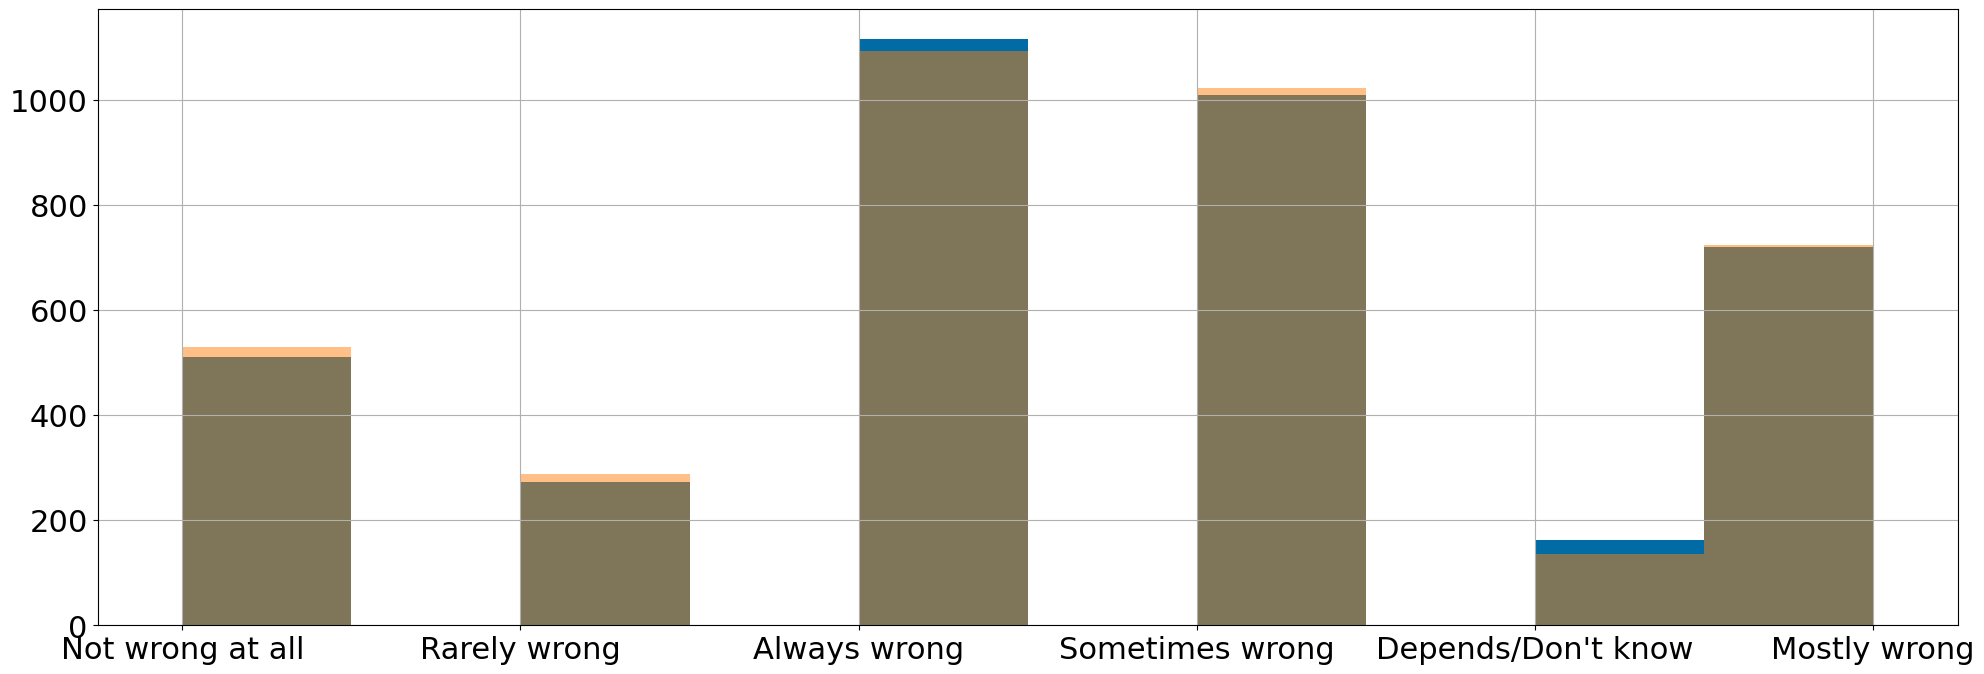

In [81]:
df['opp_one_night_stand_ok'].hist(alpha=1)
syn_df['opp_one_night_stand_ok'].hist(alpha=0.5)

In [82]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
corr.style.background_gradient(cmap='coolwarm')

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
synth_first_name,1.000000,0.966371,0.977271,-0.003220,0.018963,0.005219,0.017850,0.026836,0.008146,-0.003165,0.017035,-0.018928,0.010069,0.023670
synth_last_name,0.966371,1.000000,0.989724,0.005490,0.019467,0.004560,0.017164,0.027751,0.008463,-0.003701,0.012835,-0.015654,0.019796,0.024395
synth_email,0.977271,0.989724,1.000000,0.003053,0.022002,0.003781,0.017109,0.026911,0.011343,-0.000724,0.014801,-0.016417,0.017326,0.026462
age_group,-0.003220,0.005490,0.003053,1.000000,0.009938,-0.069546,-0.026771,0.266633,0.325905,0.037928,0.022669,0.027836,-0.021149,-0.038431
sex,0.018963,0.019467,0.022002,0.009938,1.000000,0.004397,-0.016689,0.101559,0.196688,0.091405,0.153110,-0.001100,-0.030782,-0.000101
ethnic_group,0.005219,0.004560,0.003781,-0.069546,0.004397,1.000000,0.131474,-0.071916,-0.087343,-0.008410,0.134416,0.073170,0.027309,-0.007687
sexual_identity,0.017850,0.017164,0.017109,-0.026771,-0.016689,0.131474,1.000000,-0.068126,-0.098954,-0.087697,-0.042552,-0.027420,0.004278,-0.026173
relationship_status,0.026836,0.027751,0.026911,0.266633,0.101559,-0.071916,-0.068126,1.000000,0.401070,0.029526,0.004157,0.002041,-0.036462,-0.031791
has_child,0.008146,0.008463,0.011343,0.325905,0.196688,-0.087343,-0.098954,0.401070,1.000000,0.052341,0.060113,0.029074,-0.026258,-0.021121
opp_one_night_stand_ok,-0.003165,-0.003701,-0.000724,0.037928,0.091405,-0.008410,-0.087697,0.029526,0.052341,1.000000,0.089213,-0.022047,-0.035561,-0.010821


In [83]:
syn_corr = syn_df.apply(lambda x : pd.factorize(x)[0]).corr()
syn_corr.style.background_gradient(cmap='coolwarm')

,synth_first_name,synth_last_name,synth_email,age_group,sex,ethnic_group,sexual_identity,relationship_status,has_child,opp_one_night_stand_ok,opp_sex_without_love_ok,opp_pressure_to_have_sex,opp_men_have_higher_sex_drive,opp_too_much_sex_media
synth_first_name,1.000000,0.943446,0.987969,0.013029,-0.009722,0.019754,0.019872,0.028720,-0.002780,0.014029,0.012838,0.007861,0.023488,0.023721
synth_last_name,0.943446,1.000000,0.956401,0.010481,-0.003404,0.020827,0.019868,0.037143,0.009252,0.009957,0.003450,0.013447,0.016691,0.032139
synth_email,0.987969,0.956401,1.000000,0.011048,-0.009107,0.018875,0.019790,0.033990,0.000474,0.010869,0.010081,0.006582,0.028564,0.025593
age_group,0.013029,0.010481,0.011048,1.000000,-0.009036,0.000535,0.000391,0.153059,0.315938,0.016339,0.065829,-0.006100,0.044202,0.016342
sex,-0.009722,-0.003404,-0.009107,-0.009036,1.000000,-0.002418,0.009639,0.014917,0.189980,0.047779,0.127865,-0.093277,0.065664,0.014623
ethnic_group,0.019754,0.020827,0.018875,0.000535,-0.002418,1.000000,0.162887,-0.023145,-0.028004,0.059410,0.110864,0.081196,-0.015207,0.007574
sexual_identity,0.019872,0.019868,0.019790,0.000391,0.009639,0.162887,1.000000,-0.045258,-0.094490,-0.002712,-0.013747,0.022722,-0.008222,-0.013307
relationship_status,0.028720,0.037143,0.033990,0.153059,0.014917,-0.023145,-0.045258,1.000000,0.269001,-0.038607,-0.044425,0.039225,0.055031,0.025849
has_child,-0.002780,0.009252,0.000474,0.315938,0.189980,-0.028004,-0.094490,0.269001,1.000000,0.022030,0.045870,0.000621,0.014664,0.027991
opp_one_night_stand_ok,0.014029,0.009957,0.010869,0.016339,0.047779,0.059410,-0.002712,-0.038607,0.022030,1.000000,0.109543,0.006431,0.015409,0.055403


## Synthpop - summary
We can see here that our first names correlate largely with our last names and email. This isn't suprising as we never generated a full dataset so they are still mostly "FIRST_NAME", "LAST_NAME" and "TEST@EMAIL.COM".
All variables correlate with themselves.

The strongest correlations are between age, relationship status, child status.
There also seems to be some relationship between ethnic group and sexual_identity.
It also seems that one gender seems to be more likely to have a child than another.

Some of these correlations have remained close such as the relationship between age_group and having a child.
child and relationship status have changed quite a lot, dropping from a tight correlation of 0.4 down to 0.26

What we do have at the end of this process though, is a collection of connected oppinion data, with disclosure control used to make our data look the same as the original. Analysis could be applied to our synthetic data to test our methods while we wait for approved access to the original data. 

In this case the starting data was also synthetic, but now that we can test our methods without needing the personal data we could even hand over a notebook like this to the data provider, and hope they will apply the data themselves.

## Synthpop - Next steps
outside of this demo check out these [advanced resources](https://www.synthpop.org.uk/resources.html)

Now you have managed your first synthesis you could read our paper in the Journal of Statistical Software and explore other resources on our website with more explanation of different features of synthpop including:
* statistical disclosure control functions,
* customising your synthesis by defining methods, order and predictor matrix,
* evaluating the utility of the synthetic data,
* comparing model fits between observed and synthetic data.

# Conclusion
To conclude:
- Exploratory data analysis is needed to understand dataset context.
- From here Mockaroo can do the job of basic masking.
- If a dataset is too large we can write a custom Faker provider.
- Synthpop is quite easy to use, but has very deep and academic style tutorials.

Any questions?